In [1]:
# necessary imports
# Pandas to read in the CSV file and create the data frame
import pandas as pd
# NumPy for some basic mathematical functions
import numpy as np
from numpy import sort
# Xgboost for optimized distributed gradient boosting
from xgboost import XGBClassifier, plot_tree, plot_importance
# scikit-learn for simple and efficient tools for data mining and data analysis
from sklearn.model_selection import (train_test_split, GridSearchCV, StratifiedShuffleSplit,
cross_val_score, cross_val_predict, StratifiedKFold, KFold)
from sklearn.metrics import (accuracy_score, auc, confusion_matrix, make_scorer, 
precision_recall_curve, recall_score, precision_score, f1_score, matthews_corrcoef,
brier_score_loss, roc_curve)
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.utils import shuffle
# Imblearn for imbalanced-learn package
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.under_sampling import EditedNearestNeighbours, RandomUnderSampler, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
# matplotlib : Python 2D plotting library
import matplotlib.pyplot as plt
# seaborn : Python data visualization library based on matplotlib
import seaborn as sns
from math import ceil

/home/sylvain/miniconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/home/sylvain/miniconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
# load data
# df = pd.read_csv('Base_ptf.csv', engine='python',sep=';',parse_dates=['date'],index_col=['date'])
df = pd.read_csv('Base_ptf_2018.csv', engine='python', sep=';')

In [3]:
df['date'] = pd.to_datetime(df['date'])

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.shape

(794729, 30)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794729 entries, 0 to 794728
Data columns (total 30 columns):
date                             794729 non-null datetime64[ns]
tmg                              794729 non-null float64
vac_euro_net                     794729 non-null float64
vac_euro_brut                    794729 non-null float64
vac_uc                           794729 non-null float64
sexe                             794729 non-null object
capres                           147828 non-null float64
nb_support                       794729 non-null int64
age                              794719 non-null float64
anciennete                       794726 non-null float64
anciennete_em                    794726 non-null float64
taux_uc                          794728 non-null float64
cac_m1                           794729 non-null float64
cac_m2                           794729 non-null float64
cac_m3                           794729 non-null float64
cac_m12                       

In [7]:
# Shuffle rows
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df.head(10)

,date,tmg,vac_euro_net,vac_euro_brut,vac_uc,sexe,capres,nb_support,age,anciennete,...,Prix_evol_passee,Prix_evol_futur,Opportunite_achats_importants,Opportunite_epargner,Capacite_epargne_actuelle,Sit_fin_perso_passee,Sit_fin_perso_evolution,Capacite_epargne_future,moyenne,arb
0,2018-09-30,0.0,2522.30,2522.30,0.00,F,NaN,10,40.0,3.0,...,-25.410853,-20.574219,-8.305295,6.742057,11.199373,-27.658955,-11.289518,-1.664328,1.27,0
1,2018-02-28,0.0,3922.69,3922.69,508.39,F,NaN,10,74.0,5.0,...,-47.350682,-33.992008,-2.640918,4.621879,10.723456,-17.142681,-9.831470,0.110471,1.26,0
2,2018-10-31,0.0,8903.51,8903.51,72882.38,F,NaN,10,48.0,11.0,...,-25.572711,-21.126294,-8.801243,12.010025,11.203815,-29.320784,-11.670263,-5.363873,1.26,0
3,2018-04-30,0.0,57854.73,57854.73,0.00,M,1.0,10,81.0,8.0,...,-36.103164,-20.226812,-3.393839,5.009052,10.543828,-22.883813,-18.599835,-8.237354,1.21,0
4,2018-09-30,0.0,5726.96,5726.96,0.00,F,NaN,10,91.0,9.0,...,-25.410853,-20.574219,-8.305295,6.742057,11.199373,-27.658955,-11.289518,-1.664328,1.27,0
5,2018-07-31,0.0,220.27,220.27,73.09,M,NaN,10,4.0,0.0,...,-29.794865,-18.446246,-5.313490,7.601280,9.866086,-24.971824,-12.965254,-3.817514,1.22,0
6,2018-05-31,0.0,32601.23,32601.23,0.00,F,NaN,10,64.0,4.0,...,-37.771723,-24.739691,-5.073132,5.164927,9.709774,-24.159897,-12.251141,-7.697894,1.19,0
7,2018-04-30,0.0,388.51,388.51,0.00,F,NaN,10,32.0,7.0,...,-36.103164,-20.226812,-3.393839,5.009052,10.543828,-22.883813,-18.599835,-8.237354,1.21,0
8,2018-02-28,0.0,15144.54,15144.54,0.00,F,NaN,10,67.0,8.0,...,-47.350682,-33.992008,-2.640918,4.621879,10.723456,-17.142681,-9.831470,0.110471,1.26,0
9,2018-01-31,0.0,1406.88,1406.88,0.00,F,NaN,10,78.0,13.0,...,-45.922167,-26.203997,-4.059026,4.136823,11.846073,-19.288271,-9.691206,-1.416496,1.59,0


/home/sylvain/miniconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/sylvain/miniconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/sylvain/miniconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/sylvain/miniconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


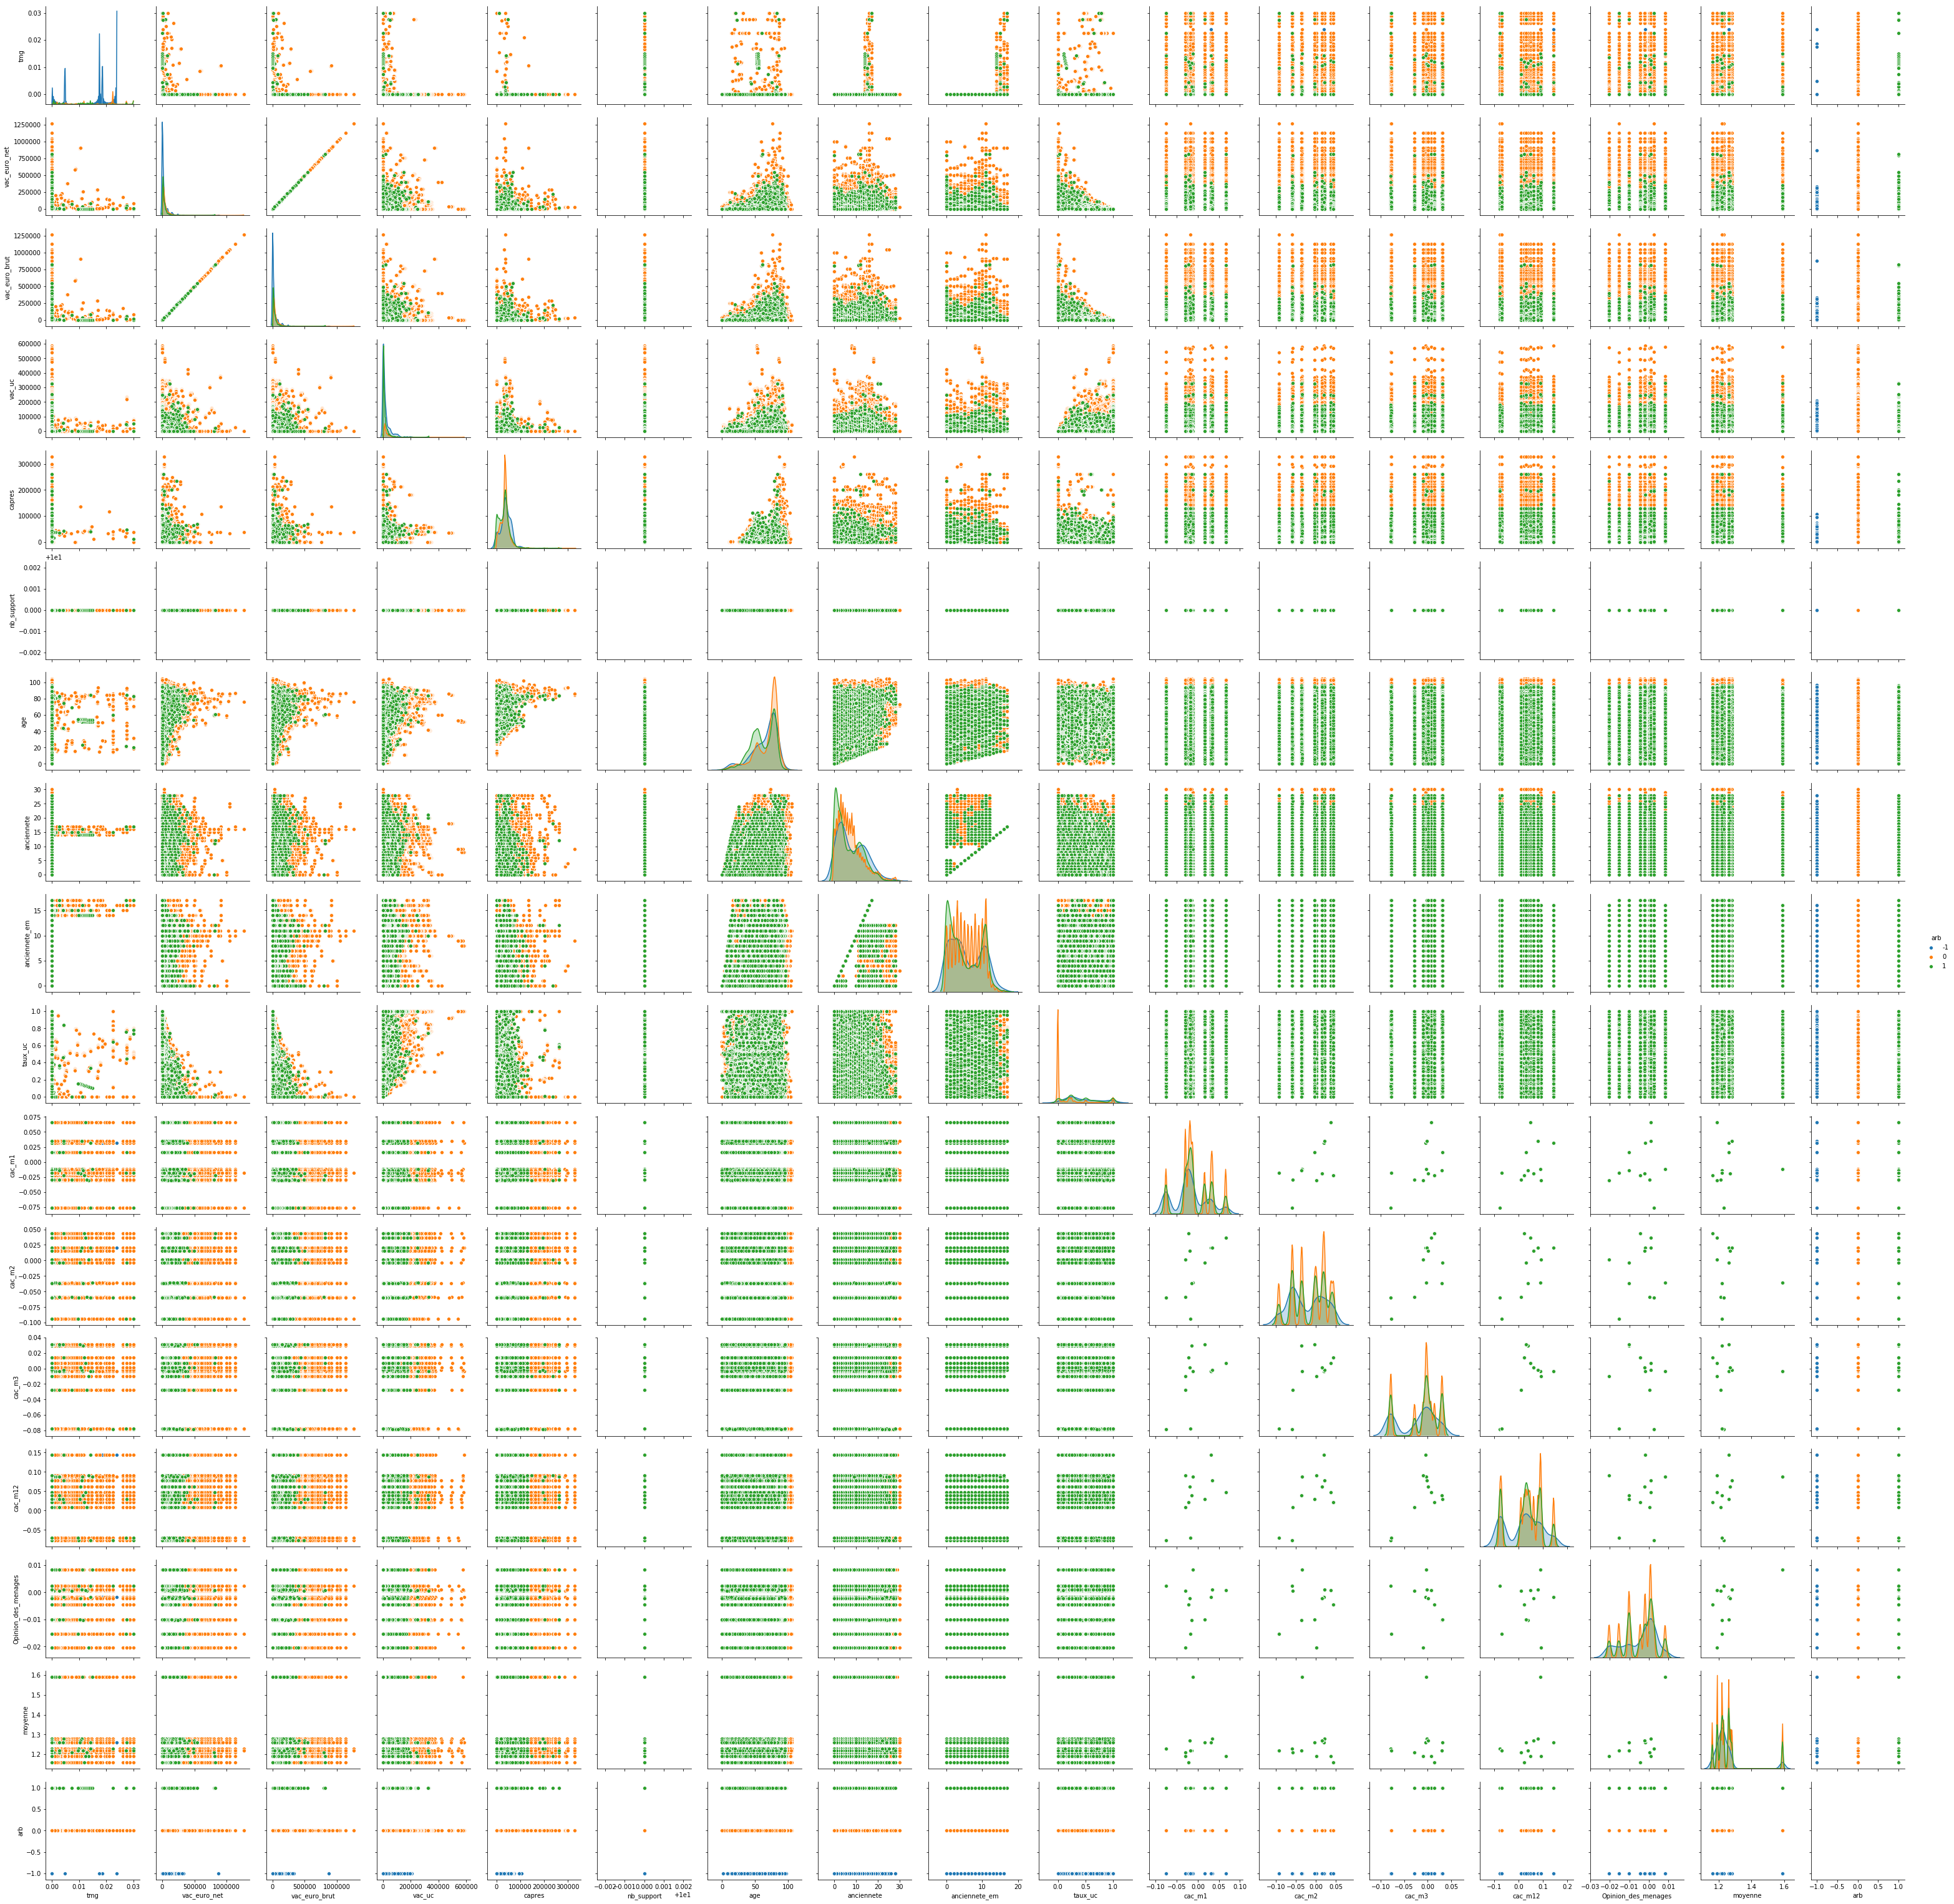

In [7]:
sns.pairplot(df, hue="arb")

/home/sylvain/miniconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/sylvain/miniconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


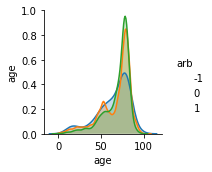

In [8]:
sns.pairplot(df, hue="arb", vars=["age"])

In [9]:
array=[2017, 2018]
df_subset=pd.DataFrame(df[df.date.dt.year.isin(array)])
print(type(df_subset))

<class 'pandas.core.frame.DataFrame'>


In [10]:
df_subset.shape

(794729, 30)

In [214]:
#df_subset = shuffle(df_subset)

In [11]:
df_subset.arb.value_counts()

 0    792524
 1      1860
-1       345
Name: arb, dtype: int64

In [12]:
# Recoder la variable arbitrage
df_subset['arb']=df_subset['arb'].eq(1).astype('int')
df_subset.arb.value_counts()

0    792869
1      1860
Name: arb, dtype: int64

In [13]:
# List categorical variables
df_subset.describe(include='object')
# d: dictionary {old:new}
d = {'M': 1, 'F': 2}
df_subset['sexe'] = df_subset['sexe'].map(d)
df_subset['sexe'] = df_subset['sexe'].astype(float)

In [14]:
df_subset['age'].fillna((df_subset['age'].median()), inplace=True)
df_subset['anciennete'].fillna((df_subset['anciennete'].median()), inplace=True)
df_subset['anciennete_em'].fillna((df_subset['anciennete_em'].median()), inplace=True)
df_subset['taux_uc'].fillna(0, inplace=True)
df_subset['capres'].fillna(0, inplace=True)
df_subset.isnull().sum()
# mark zero values as missing or NaN
#X = X.replace(0, np.NaN)
# fill missing values with mean column values
#X.fillna(X.mean(), inplace=True)
# count the number of NaN values in each column
#print(X.isnull().sum())

date                             0
tmg                              0
vac_euro_net                     0
vac_euro_brut                    0
vac_uc                           0
sexe                             0
capres                           0
nb_support                       0
age                              0
anciennete                       0
anciennete_em                    0
taux_uc                          0
cac_m1                           0
cac_m2                           0
cac_m3                           0
cac_m12                          0
Opinion_des_menages              0
Niveau_de_vie_passee             0
Niveau_de_vie_evolution          0
Chomage_evolution                0
Prix_evol_passee                 0
Prix_evol_futur                  0
Opportunite_achats_importants    0
Opportunite_epargner             0
Capacite_epargne_actuelle        0
Sit_fin_perso_passee             0
Sit_fin_perso_evolution          0
Capacite_epargne_future          0
moyenne             

Class 0: 792869
Class 1: 1860
Proportion: 426.27 : 1


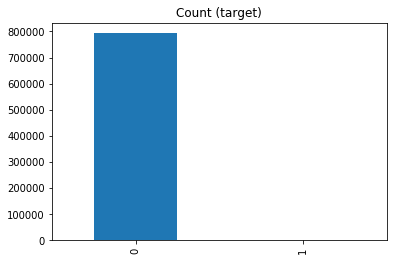

In [15]:
# Imbalanced datasets
target_count = df_subset.arb.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)')

In [16]:
normal_df = df_subset[df_subset.arb == 0] #save normal_df observations into a separate df
arbitrage_df = df_subset[df_subset.arb == 1] #do the same for frauds

In [17]:
sexe=arbitrage_df.groupby('sexe')['arb'].count()
age=arbitrage_df.groupby('age')['arb'].count()
anciennete_em=arbitrage_df.groupby('anciennete_em')['arb'].count()
taux_uc=arbitrage_df.groupby('taux_uc')['arb'].count()
vac_euro_net=arbitrage_df.groupby('vac_euro_net')['arb'].count()

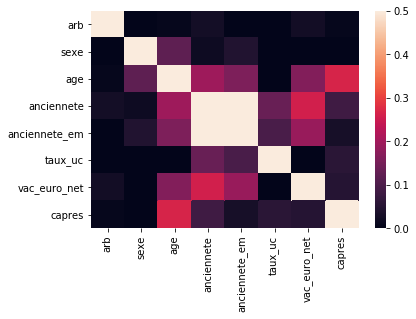

In [18]:
data_cor=df_subset[['arb','sexe','age','anciennete','anciennete_em','taux_uc','vac_euro_net','capres']]
correlations = data_cor.corr()
sns.heatmap(correlations, vmin=0.0, vmax=0.5)

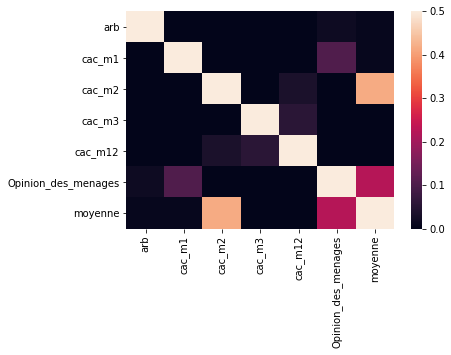

In [19]:
data_cor=df_subset[['arb','cac_m1','cac_m2','cac_m3','cac_m12','Opinion_des_menages','moyenne']]
correlations = data_cor.corr()
sns.heatmap(correlations, vmin=0.0, vmax=0.5)

In [104]:
# split data into X and y
#X = pd.DataFrame(df_subset[['sexe','age','anciennete_em','taux_uc','vac_euro_net','capres']])
X = df_subset.drop(['date','arb','vac_uc','vac_euro_brut'], axis=1)
y = df_subset.arb
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [283]:
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import chi2
#model = SelectKBest(k=2).fit(X, y)
#X.columns[model.get_support()]

In [21]:
X.describe()

,tmg,vac_euro_net,sexe,capres,nb_support,age,anciennete,anciennete_em,taux_uc,cac_m1,...,Chomage_evolution,Prix_evol_passee,Prix_evol_futur,Opportunite_achats_importants,Opportunite_epargner,Capacite_epargne_actuelle,Sit_fin_perso_passee,Sit_fin_perso_evolution,Capacite_epargne_future,moyenne
count,794729.000000,7.947290e+05,794729.000000,794729.000000,794729.0,794729.000000,794729.000000,794729.000000,794729.000000,794729.000000,...,794729.000000,794729.000000,794729.000000,794729.000000,794729.000000,794729.000000,794729.000000,794729.000000,794729.000000,794729.000000
mean,0.000028,2.326614e+04,1.652911,0.178173,10.0,67.351047,7.077669,5.867625,0.145344,5366.664706,...,9.287294,-31.539334,-21.339572,-5.831085,6.284909,10.805205,-24.547139,-12.965945,-5.534547,1.256081
std,0.000765,4.317846e+04,0.476045,0.382658,0.0,18.490651,5.543389,3.739483,0.262956,129.045789,...,6.855598,10.676135,5.288137,2.588643,2.241112,0.926342,4.561871,2.532031,3.296032,0.105267
min,0.000000,0.000000e+00,1.000000,0.000000,10.0,0.000000,0.000000,0.000000,0.000000,5093.440000,...,0.659255,-47.350682,-33.992008,-9.048467,3.964662,9.590150,-29.770558,-18.599835,-9.258645,1.160000
25%,0.000000,7.126800e+02,1.000000,0.000000,10.0,56.000000,3.000000,3.000000,0.000000,5312.560000,...,5.041298,-37.771723,-24.739691,-8.801243,4.671663,9.832064,-29.320784,-15.650491,-8.633219,1.210000
50%,0.000000,7.213650e+03,2.000000,0.000000,10.0,75.000000,6.000000,6.000000,0.000000,5398.400000,...,6.174959,-29.794865,-20.226812,-5.313490,5.386757,10.691414,-26.321109,-12.333135,-7.697894,1.230000
75%,0.000000,2.816440e+04,2.000000,0.000000,10.0,80.000000,10.000000,9.000000,0.214601,5493.490000,...,16.909981,-25.023733,-16.282375,-3.393839,7.601280,11.203815,-22.883813,-11.550336,-2.695195,1.260000
max,0.030000,1.264357e+06,2.000000,1.000000,10.0,105.000000,30.000000,17.000000,1.000000,5520.500000,...,22.319421,-13.815963,-14.495541,-2.238694,12.010025,12.570997,-15.987312,-9.691206,0.110471,1.590000


In [22]:
# count the number of NaN values in each column
print(X.isnull().sum())

tmg                              0
vac_euro_net                     0
sexe                             0
capres                           0
nb_support                       0
age                              0
anciennete                       0
anciennete_em                    0
taux_uc                          0
cac_m1                           0
cac_m2                           0
cac_m3                           0
cac_m12                          0
Opinion_des_menages              0
Niveau_de_vie_passee             0
Niveau_de_vie_evolution          0
Chomage_evolution                0
Prix_evol_passee                 0
Prix_evol_futur                  0
Opportunite_achats_importants    0
Opportunite_epargner             0
Capacite_epargne_actuelle        0
Sit_fin_perso_passee             0
Sit_fin_perso_evolution          0
Capacite_epargne_future          0
moyenne                          0
dtype: int64


In [105]:
# split data into train and test sets
seed = 42
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=seed)

# Show the class distribution in each label set
def get_class_dist(data, name):
    unique, counts = np.unique(data, return_counts=True)
    pct = 100*(counts/len(data))
    d = dict(zip(unique, zip(counts, pct)))
    print(len(data), 'total examples in %s' % name)
    for key, values in d.items():
        print('class %d: %d examples,' % (key, values[0]), "{0:.2f}%".format(values[1]))
    print('')
    return
 
get_class_dist(data=y_train, name='y_train')
get_class_dist(data=y_test, name='y_test')

532468 total examples in y_train
class 0: 531222 examples, 99.77%
class 1: 1246 examples, 0.23%

262261 total examples in y_test
class 0: 261647 examples, 99.77%
class 1: 614 examples, 0.23%



In [106]:
# Normalize the data : MinMaxScaler
#mm_scaler = MinMaxScaler()
#X_train_std = pd.DataFrame(mm_scaler.fit_transform(X_train),columns = X_train.columns)
#X_test_std = pd.DataFrame(mm_scaler.fit_transform(X_test),columns = X_test.columns)

mm_scaler = MinMaxScaler().fit(X_train)

X_train_std = pd.DataFrame(mm_scaler.transform(X_train),columns = X_train.columns)
X_test_std = pd.DataFrame(mm_scaler.transform(X_test),columns = X_test.columns)

scaler = MinMaxScaler()
X_std = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)

print(X_train_std.shape)
print(type(X_train_std))
print(X_test_std.shape)
print(type(X_test_std))
print(X_std.shape)
print(type(X_std))

(532468, 26)
<class 'pandas.core.frame.DataFrame'>
(262261, 26)
<class 'pandas.core.frame.DataFrame'>
(794729, 26)
<class 'pandas.core.frame.DataFrame'>


In [25]:
print(y_train.value_counts())
print(y_test.value_counts())

0    531222
1      1246
Name: arb, dtype: int64
0    261647
1       614
Name: arb, dtype: int64


In [26]:
# Régression Logistique
# Train model
lr = LogisticRegression(solver='liblinear').fit(X_train_std, y_train)
 
# Predict on test set
lr_pred = lr.predict(X_test_std)

# Checking accuracy
print("Accuracy: %.2f%%" % (accuracy_score(y_test, lr_pred) * 100.0))
print("MCC: %.2f%%" % (matthews_corrcoef(y_test, lr_pred) * 100.0))
print('')
print('Confusion Matrix')
confusion_matrix(y_test, lr_pred)

Accuracy: 99.77%


/home/sylvain/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


MCC: 0.00%

Confusion Matrix


array([[261647,      0],
       [   614,      0]])

In [27]:
# Random Forest Classifier
# Train model
rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1).fit(X_train_std, y_train)

# Predict on test set
rfc_pred = rfc.predict(X_test_std)

# Checking accuracy
print("Accuracy: %.2f%%" % (accuracy_score(y_test, rfc_pred) * 100.0))
print("MCC: %.2f%%" % (matthews_corrcoef(y_test, rfc_pred) * 100.0))
print('')
print('Confusion Matrix')
confusion_matrix(y_test, rfc_pred)

Accuracy: 99.81%
MCC: 45.67%

Confusion Matrix


array([[261612,     35],
       [   457,    157]])

In [28]:
# Balanced Random Forest Classifier
# Train model
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1).fit(X_train_std, y_train)

# Predict on test set
brf_pred = brf.predict(X_test_std)

# Checking accuracy
print("Accuracy: %.2f%%" % (accuracy_score(y_test, brf_pred) * 100.0))
print("MCC: %.2f%%" % (matthews_corrcoef(y_test, brf_pred) * 100.0))
print('')
print('Confusion Matrix')
confusion_matrix(y_test, brf_pred)

Accuracy: 78.75%
MCC: 5.11%

Confusion Matrix


array([[206140,  55507],
       [   218,    396]])

In [29]:
# XGBoost
# Train model
xgb = XGBClassifier(n_jobs=-1).fit(X_train_std, y_train)

# Predict on test set
xgb_pred = xgb.predict(X_test_std)

# Checking accuracy
print("Accuracy: %.2f%%" % (accuracy_score(y_test, xgb_pred) * 100.0))
print("MCC: %.2f%%" % (matthews_corrcoef(y_test, xgb_pred) * 100.0))
print('')
print('Confusion Matrix')
confusion_matrix(y_test, xgb_pred)

Accuracy: 99.82%
MCC: 49.82%

Confusion Matrix


array([[261590,     57],
       [   417,    197]])

In [30]:
# AdaBoost
# Train model
abc = AdaBoostClassifier().fit(X_train_std, y_train)

# Predict on test set
abc_pred = abc.predict(X_test_std)

# Checking accuracy
print("Accuracy: %.2f%%" % (accuracy_score(y_test, abc_pred) * 100.0))
print("MCC: %.2f%%" % (matthews_corrcoef(y_test, abc_pred) * 100.0))
print('')
print('Confusion Matrix')
confusion_matrix(y_test, abc_pred)

Accuracy: 99.77%
MCC: 4.03%

Confusion Matrix


array([[261647,      0],
       [   613,      1]])

Confusion matrix:
 [[261590     57]
 [   417    197]]


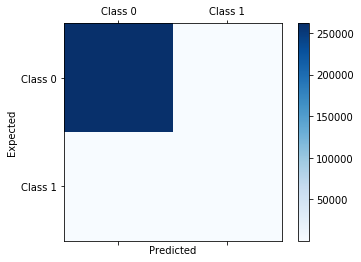

In [31]:
# Confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=xgb_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [32]:
# XGBoost avec une seule variable
model = XGBClassifier(nthread=-1)
model.fit(X_train_std[['vac_euro_net']], y_train)
y_pred = model.predict(X_test_std[['vac_euro_net']])

print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred) * 100.0))
print('Confusion Matrix')
confusion_matrix(y_test, y_pred)

Accuracy: 99.82%
Confusion Matrix


array([[261590,     57],
       [   417,    197]])

In [35]:
# Variables d'importances du XGBoost
feat_labels =  X.dtypes.pipe(lambda x: x).index

xgb = XGBClassifier(n_jobs=-1, random_state=42)
xgb.fit(X_train_std, y_train)
for feature in zip(feat_labels, xgb.feature_importances_):
    print(feature)

('tmg', 0.0)
('vac_euro_net', 0.28070176)
('sexe', 0.0063795852)
('capres', 0.01754386)
('nb_support', 0.0)
('age', 0.097288676)
('anciennete', 0.16427432)
('anciennete_em', 0.17862839)
('taux_uc', 0.11642743)
('cac_m1', 0.01754386)
('cac_m2', 0.0)
('cac_m3', 0.0)
('cac_m12', 0.004784689)
('Opinion_des_menages', 0.039872408)
('Niveau_de_vie_passee', 0.015948962)
('Niveau_de_vie_evolution', 0.004784689)
('Chomage_evolution', 0.007974481)
('Prix_evol_passee', 0.0)
('Prix_evol_futur', 0.0)
('Opportunite_achats_importants', 0.0)
('Opportunite_epargner', 0.0015948963)
('Capacite_epargne_actuelle', 0.0)
('Sit_fin_perso_passee', 0.039872408)
('Sit_fin_perso_evolution', 0.004784689)
('Capacite_epargne_future', 0.0)
('moyenne', 0.0015948963)


In [36]:
# Sélection des variables d'importances du XGBoost
sfm = SelectFromModel(xgb, threshold = 0.01)
sfm.fit(X_train_std, y_train)
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

vac_euro_net
capres
age
anciennete
anciennete_em
taux_uc
cac_m1
Opinion_des_menages
Niveau_de_vie_passee
Sit_fin_perso_passee


In [37]:
X_important_train = sfm.transform(X_train_std)
X_important_test = sfm.transform(X_test_std)
X_important = sfm.transform(X)

In [38]:
print(X.shape,X_important.shape)

(794729, 26) (794729, 10)


In [39]:
# Réduction des variables sur XGBoost
xgb = XGBClassifier(nthread=-1).fit(X_important_train, y_train)

# predict on test set
xgb_pred = xgb.predict(X_important_test)

print("Accuracy: %.2f%%" % (accuracy_score(y_test, xgb_pred) * 100.0))
print("MCC: %.2f%%" % (matthews_corrcoef(y_test, xgb_pred) * 100.0))
print('')
print('Confusion Matrix')
confusion_matrix(y_test, xgb_pred)

Accuracy: 99.82%
MCC: 49.60%

Confusion Matrix


array([[261591,     56],
       [   419,    195]])

In [56]:
import joblib  # to check you can parallelize GridSearchCV
model = XGBClassifier(nthread=-1)
clf = GridSearchCV(model,
                   {'max_depth': [2,4,6],
                    'n_estimators': [50,100,200]}, verbose=1, n_jobs=1, pre_dispatch=1, cv=5)
clf.fit(X_important,y)
clf.best_score_, clf.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 44.4min finished


(0.9979200457011133, {'max_depth': 4, 'n_estimators': 50})

In [209]:
def model_resampling(model, X_train, X_test, y_train, y_test, resampling, calibrate, k=5, random_state=42, print_res = True):
    # Convert inputs to numpy arrays
    X = np.array(X_train)
    y = np.array(y_train)
    
    # Define the cross-validation parameters
    # Common values of k are 5 and 10, as these have been shown experimentally to produce the best results
    cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=random_state)
    
    # Create lists to save results to
    mcc_valid = []
    brier_valid = []
    actual_goals_valid = []
    pred_goals_valid = []
    accuracy_valid = []
    f1_valid = []
    recall_valid = []
    
    mcc_test = []
    brier_test = []
    actual_goals_test = []
    pred_goals_test = []
    accuracy_test = []
    f1_test = []
    recall_test = []
    
    model_name = model.__class__.__name__
    
    # Create training and test data using cross validation and fit model for each fold
    for ii, (train_index, valid_index) in enumerate(cv.split(X, y)):
        X_train, X_valid = X[train_index], X[valid_index]
        y_train, y_valid = y[train_index], y[valid_index]
        
        if resampling == None:
            res = 'no'
        else:
            X_train, y_train = resampling.fit_resample(X_train, y_train)
            res = resampling.__class__.__name__
        
        # Normalize the data
        #ss = StandardScaler()
        mm_scaler = MinMaxScaler().fit(X_train)
        X_train_std = mm_scaler.transform(X_train)
        X_valid_std = mm_scaler.transform(X_valid)
        X_test_std = mm_scaler.transform(X_test)
        
        # Calibrate model if necessary
        if calibrate == None:
            calibrated_probs = 'uncalibrated probabilities'
            model.fit(X_train_std, y_train)
        else:
            model = CalibratedClassifierCV(model, cv=2, method=calibrate)
            model.fit(X_train_std, y_train)
            calibrated_probs = '%s calibration' % calibrate
            
        y_pred_valid = model.predict(X_valid_std)
        y_pred_test = model.predict(X_test_std)
        y_pred_valid_proba = model.predict_proba(X_valid_std)[:,1]
        y_pred_test_proba = model.predict_proba(X_test_std)[:,1]
 
        # Calculate mcc score, brier_loss and sum of predicted goal probabilities
        actual_goals_valid.append(sum(y_valid))
        pred_goals_valid.append(sum(y_pred_valid_proba))
        mcc_valid.append(matthews_corrcoef(y_valid, y_pred_valid))
        brier_valid.append(brier_score_loss(y_valid, y_pred_valid_proba))
        f1_valid.append(f1_score(y_valid, y_pred_valid))
        recall_valid.append(recall_score(y_valid, y_pred_valid))
        accuracy_valid.append(accuracy_score(y_valid, y_pred_valid))
        
        actual_goals_test.append(sum(y_test))
        pred_goals_test.append(sum(y_pred_test_proba))
        mcc_test.append(matthews_corrcoef(y_test, y_pred_test))
        brier_test.append(brier_score_loss(y_test, y_pred_test_proba))
        f1_test.append(f1_score(y_test, y_pred_test))
        recall_test.append(recall_score(y_test, y_pred_test))
        accuracy_test.append(accuracy_score(y_test, y_pred_test))
        
        # Save the results to a dataframe
    check_valid = pd.DataFrame()
    check_valid['mcc'] = mcc_valid
    check_valid['brier_loss'] = brier_valid
    check_valid['actual_goals'] = actual_goals_valid
    check_valid['predicted_goals'] = pred_goals_valid
    check_valid['goals_diff'] = abs(check_valid['actual_goals'] - check_valid['predicted_goals'])
    check_valid['f1'] = f1_valid
    check_valid['recall'] = recall_valid
    check_valid['accuracy'] = accuracy_valid
    
    check_test = pd.DataFrame()
    check_test['mcc'] = mcc_test
    check_test['brier_loss'] = brier_test
    check_test['actual_goals'] = actual_goals_test
    check_test['predicted_goals'] = pred_goals_test
    check_test['goals_diff'] = abs(check_test['actual_goals'] - check_test['predicted_goals'])
    check_test['f1'] = f1_test
    check_test['recall'] = recall_test
    check_test['accuracy'] = accuracy_test
    
    # Print a summary of the results if required
    if print_res == True:
        print('Method: %s with %s resampling and %s'
              % (model_name, res, calibrated_probs))
        print('Goals:', '{0:.2f}'.format(check_test['actual_goals'].mean()))
        print('Predicted Goals:', '{0:.2f}'.format(check_test['predicted_goals'].mean()))
        print('MCC:', '{0:.2%}'.format(check_test['mcc'].mean()))
        print('Brier Loss:', '{0:.2%}'.format(check_test['brier_loss'].mean()))
        print('F1_score:', '{:.2%}'.format(check_test['f1'].mean()))
        print('Recall_score:', '{:.2%}'.format(check_test['recall'].mean()))
        print('Accuracy:', '{:.2%}'.format(check_test['accuracy'].mean()))
        print('')
    else: pass
 
    return check_valid, check_test

In [219]:
# Define a function to plot barplot comparisons of models
def barplot_comparison(df, subset, x='name', y1='mcc', y2='brier_loss', figsize=(18, 8)):
    sns.set(style='white')
 
    f, axs = plt.subplots(ncols=2, figsize=figsize, sharey=False)
     
    # Plot bars
    sns.barplot(x=x, y=y1, data=df, palette='muted', ax=axs[0]).set_title(subset)
    sns.barplot(x=x, y=y2, data=df, palette='muted', ax=axs[1]).set_title(subset)
 
    # Tweak the visual presentation
    axs[0].yaxis.grid(True)
    axs[0].set(xlabel="", ylim=(min(df[y1]-0.02),max(df[y1]+0.02)))
    axs[1].yaxis.grid(True)
    axs[1].set(xlabel="", ylim=(min(df[y2]-0.02),max(df[y2]+0.02)))
    sns.despine(trim=True, left=True);
     
    return

/home/sylvain/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/sylvain/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/sylvain/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sylvain/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sylvain/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbf

Method: LogisticRegression with no resampling and uncalibrated probabilities
Goals: 614.00
Predicted Goals: 614.85
MCC: 0.00%
Brier Loss: 0.23%
F1_score: 0.00%
Recall_score: 0.00%
Accuracy: 99.77%

Method: RandomForestClassifier with no resampling and uncalibrated probabilities
Goals: 614.00
Predicted Goals: 571.85
MCC: 45.15%
Brier Loss: 0.19%
F1_score: 38.41%
Recall_score: 25.15%
Accuracy: 99.81%

Method: BalancedRandomForestClassifier with no resampling and uncalibrated probabilities
Goals: 614.00
Predicted Goals: 92998.01
MCC: 5.09%
Brier Loss: 15.51%
F1_score: 1.39%
Recall_score: 64.63%
Accuracy: 78.57%



/home/sylvain/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/sylvain/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sylvain/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/sylvain/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sylvain/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:872: RuntimeWarning: invalid value enco

Method: AdaBoostClassifier with no resampling and uncalibrated probabilities
Goals: 614.00
Predicted Goals: 125479.55
MCC: 1.15%
Brier Loss: 22.93%
F1_score: 0.13%
Recall_score: 0.07%
Accuracy: 99.77%

Method: XGBClassifier with no resampling and uncalibrated probabilities
Goals: 614.00
Predicted Goals: 610.41
MCC: 49.92%
Brier Loss: 0.18%
F1_score: 45.17%
Recall_score: 31.63%
Accuracy: 99.82%



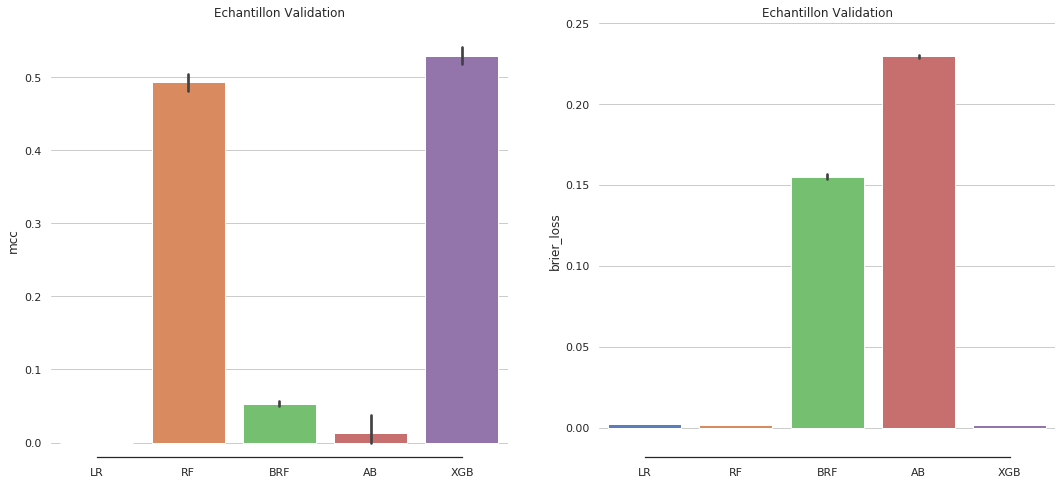

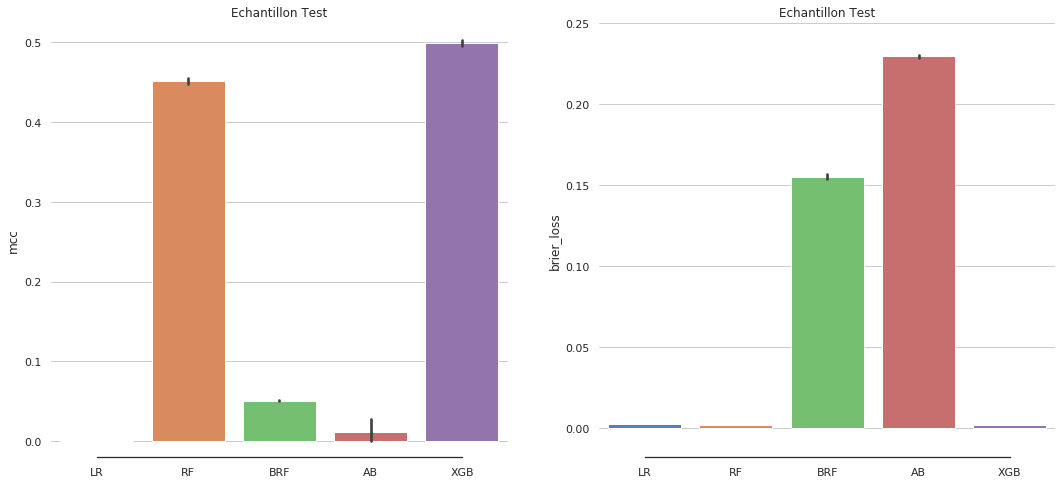

In [222]:
# split data into X and y
X = df_subset.drop(['date','arb','vac_uc','vac_euro_brut'], axis=1)
y = df_subset.arb

# split data into train and test sets
seed = 42
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=seed)

# Model results
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
lr = LogisticRegression(solver='lbfgs')
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
ab = AdaBoostClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(nthread=-1,random_state=42)

models = []
models.append(('LR', lr, None, None))
models.append(('RF', rf, None, None))
models.append(('BRF', brf, None, None))
models.append(('AB', ab, None, None))
models.append(('XGB', xgb, None, None))
 
results_df_valid = pd.DataFrame()
results_df_test = pd.DataFrame()
for name, model, resampling, calibrate in models:
    result_valid, result_test = model_resampling(model, X_train, X_test, y_train, y_test, resampling, calibrate)
    result_valid['name'] = name
    result_test['name'] = name
    results_df_valid = results_df_valid.append(result_valid)
    results_df_test = results_df_test.append(result_test)
     
barplot_comparison(results_df_valid,"Echantillon Validation")
barplot_comparison(results_df_test,"Echantillon Test")

In [40]:
import joblib  # to check you can parallelize GridSearchCV
model = XGBClassifier(nthread=-1,random_state=42)
clf = GridSearchCV(model, 
                   {'max_depth': [2,4,6], 
                    'n_estimators': [50,100,200]}, 
                   scoring = 'brier_score_loss', verbose=1, n_jobs=1, pre_dispatch=1, cv=5)
clf.fit(X_std,y)
clf.best_score_, clf.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 85.8min finished


(-0.0019271047502920585, {'max_depth': 4, 'n_estimators': 50})

In [43]:
# fit model on all training data
model = XGBClassifier(nthread=-1,random_state=42)
model.fit(X_train_std, y_train)
# make predictions for test data and evaluate
y_pred = model.predict(X_test_std)
predictions = [round(value) for value in y_pred]
mcc = matthews_corrcoef(y_test, predictions)
print("MCC: %.2f%%" % (mcc * 100.0))
# Fit model using each importance as a threshold
thresholds = np.unique(sort(model.feature_importances_))
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train_std)
    # train model
    selection_model = XGBClassifier(nthread=-1,random_state=42)
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test_std)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    mcc = matthews_corrcoef(y_test, predictions)
    print("Thresh=%.3f, n=%d, MCC: %.2f%%" % (thresh, select_X_train.shape[1], mcc*100.0))

MCC: 49.82%
Thresh=0.000, n=26, MCC: 49.82%
Thresh=0.002, n=17, MCC: 49.82%
Thresh=0.005, n=15, MCC: 49.92%
Thresh=0.006, n=12, MCC: 49.92%
Thresh=0.008, n=11, MCC: 49.92%
Thresh=0.016, n=10, MCC: 49.60%
Thresh=0.018, n=9, MCC: 49.87%
Thresh=0.040, n=7, MCC: 50.13%
Thresh=0.097, n=5, MCC: 49.32%
Thresh=0.116, n=4, MCC: 49.42%


/home/sylvain/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Thresh=0.164, n=3, MCC: 0.00%


/home/sylvain/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Thresh=0.179, n=2, MCC: 0.00%
Thresh=0.281, n=1, MCC: 0.00%


/home/sylvain/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


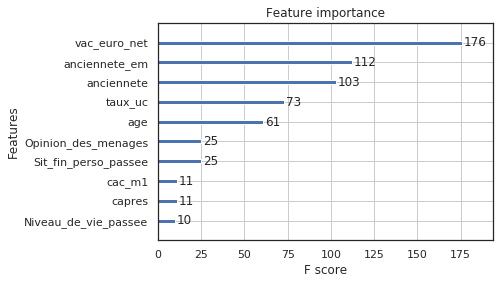

In [44]:
# plot feature importance
plot_importance(model,max_num_features=10)
plt.show()

In [45]:
# fit model on all data
model = XGBClassifier(nthread=-1,random_state=42)
model.fit(X_std, y)
# make predictions for test data and evaluate
y_pred = model.predict(X_std)
predictions = [round(value) for value in y_pred]
mcc = matthews_corrcoef(y, predictions)
print("MCC: %.2f%%" % (mcc * 100.0))
# Fit model using each importance as a threshold
thresholds = np.unique(sort(model.feature_importances_))
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X = selection.transform(X_std)
    # train model
    selection_model = XGBClassifier(nthread=-1,random_state=42)
    selection_model.fit(select_X, y)
    # eval model
    select_X = selection.transform(X_std)
    y_pred = selection_model.predict(select_X)
    predictions = [round(value) for value in y_pred]
    mcc = matthews_corrcoef(y, predictions)
    print("Thresh=%.3f, n=%d, MCC: %.2f%%" % (thresh, select_X.shape[1], mcc*100.0))

MCC: 52.30%
Thresh=0.000, n=26, MCC: 52.30%
Thresh=0.002, n=21, MCC: 52.30%
Thresh=0.003, n=18, MCC: 52.27%
Thresh=0.005, n=16, MCC: 52.27%
Thresh=0.006, n=13, MCC: 52.45%
Thresh=0.008, n=12, MCC: 52.45%
Thresh=0.009, n=11, MCC: 52.28%
Thresh=0.011, n=10, MCC: 52.27%
Thresh=0.012, n=9, MCC: 52.36%
Thresh=0.020, n=8, MCC: 52.10%
Thresh=0.032, n=7, MCC: 52.24%
Thresh=0.061, n=6, MCC: 52.28%
Thresh=0.081, n=5, MCC: 52.20%
Thresh=0.112, n=4, MCC: 52.10%


/home/sylvain/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Thresh=0.150, n=3, MCC: 0.00%


/home/sylvain/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Thresh=0.160, n=2, MCC: 0.00%
Thresh=0.313, n=1, MCC: 0.00%


/home/sylvain/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


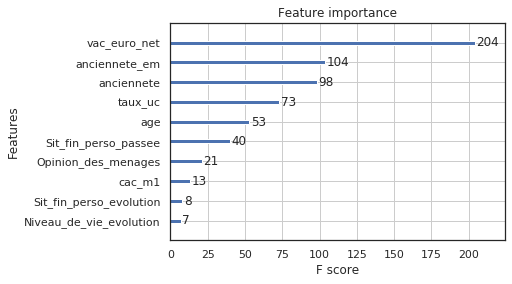

In [46]:
# plot feature importance
plot_importance(model,max_num_features=10)
plt.show()

In [52]:
def evalmcc(preds, dtrain):
    THRESHOLD = 0.5
    labels = dtrain.get_label()
    return 'MCC', matthews_corrcoef(labels, preds >= THRESHOLD)

xgb = XGBClassifier(nthread=-1,random_state=42)
xgb.fit(X_std, y, eval_set=[(X_std, y)], eval_metric=evalmcc, verbose=False)
sfm = SelectFromModel(xgb, threshold = 0.01, prefit=True)
X_important = pd.DataFrame(sfm.transform(X), columns = X.columns[sfm.get_support()])

In [53]:
X_important.shape, type(X_important), X_important.columns

((794729, 10),
 pandas.core.frame.DataFrame,
 Index(['vac_euro_net', 'age', 'anciennete', 'anciennete_em', 'taux_uc',
        'cac_m1', 'Opinion_des_menages', 'Niveau_de_vie_evolution',
        'Sit_fin_perso_passee', 'Sit_fin_perso_evolution'],
       dtype='object'))

In [150]:
import time, sys
from IPython.display import clear_output

def update_progress(progress):
    bar_length = 20
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1

    block = int(round(bar_length * progress))

    clear_output(wait = True)
    text = "Progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100)
    print(text)

In [251]:
X = df_subset.drop(['date','arb','vac_uc','vac_euro_brut'], axis=1)
y = df_subset.arb

X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X, y, test_size=0.33,random_state=42)

# Convert inputs to numpy arrays
X_train_us = np.array(X_train_us)
y_train_us = np.array(y_train_us)
X_test_us = np.array(X_test_us)
y_test_us = np.array(y_test_us)
    
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
# Create lists to save results to
mcc_cv = []
brier_cv = []
mcc_test = []
brier_test = []
no_arb_train = []
no_arb_valid = []
no_arb_test = []
    
# Create training and test data using cross validation and fit model for each fold
for ii, (train_index, valid_index) in enumerate(cv.split(X_train_us, y_train_us)):
    X_train, X_valid = X_train_us[train_index], X_train_us[valid_index]
    y_train, y_valid = y_train_us[train_index], y_train_us[valid_index]
    
    no_arb = len(pd.DataFrame(y_train)[y_train == 1])
    non_arb_indices = pd.DataFrame(y_train)[y_train == 0].index
    
    np.random.seed(42)
    random_indices = np.random.choice(non_arb_indices, no_arb, replace=False)
    arb_indices = pd.DataFrame(y_train)[y_train == 1].index
    under_sample_indices = np.concatenate([arb_indices,random_indices])
    
    X_train = X_train[under_sample_indices]
    y_train = y_train[under_sample_indices]

    mm_scaler = MinMaxScaler().fit(X_train)
    X_train_std = mm_scaler.transform(X_train)
    X_valid_std = mm_scaler.transform(X_valid)
    X_test_us_std = mm_scaler.transform(X_test_us)
    
    xgb_under = XGBClassifier(nthread=-1,random_state=42)
    xgb_under.fit(X_train_std,y_train)
    
    y_valid_pred = xgb_under.predict(X_valid_std)
    y_test_pred = xgb_under.predict(X_test_us_std)
    
    y_valid_pred_proba = xgb_under.predict_proba(X_valid_std)[:,1]
    y_test_pred_proba = xgb_under.predict_proba(X_test_us_std)[:,1]
            
    mcc_cv.append(matthews_corrcoef(y_valid, y_valid_pred))
    brier_cv.append(brier_score_loss(y_valid, y_valid_pred_proba))
    
    mcc_test.append(matthews_corrcoef(y_test_us, y_test_pred))
    brier_test.append(brier_score_loss(y_test_us, y_test_pred_proba))
    
    no_arb_train.append(no_arb)
    no_arb_valid.append(y_valid.sum())
    no_arb_test.append(y_test_us.sum())
    
    # Save the results to a dataframe
    check = pd.DataFrame()
    check['no_arb_train'] = no_arb_train
    check['no_arb_valid'] = no_arb_valid
    check['no_arb_test'] = no_arb_test
    check['mcc_cv'] = mcc_cv
    check['brier_loss_cv'] = brier_cv
    check['mcc_test'] = mcc_test
    check['brier_loss_test'] = brier_test
    
    # Print a summary of the results if required
    time.sleep(0.1) #Replace this with a real computation
    update_progress(ii / 5)

update_progress(1)
    
print('MCC CV:', '{0:.2%}'.format(check['mcc_cv'].mean()))
print('Brier Loss CV:', '{0:.2%}'.format(check['brier_loss_cv'].mean()))

print('MCC Test:', '{0:.2%}'.format(check['mcc_test'].mean()))
print('Brier Loss Test:', '{0:.2%}'.format(check['brier_loss_test'].mean()))

check

Progress: [####################] 100.0%
MCC CV: 5.85%
Brier Loss CV: 14.31%
MCC Test: 5.35%
Brier Loss Test: 14.34%


,no_arb_train,no_arb_valid,no_arb_test,mcc_cv,brier_loss_cv,mcc_test,brier_loss_test
0,996,250,614,0.057286,0.143072,0.052274,0.143285
1,997,249,614,0.058745,0.144119,0.054401,0.144712
2,997,249,614,0.062434,0.149418,0.052110,0.149015
3,997,249,614,0.054204,0.139165,0.054508,0.139586
4,997,249,614,0.059997,0.139742,0.054278,0.140312


In [270]:
X = df_subset.drop(['date','arb','vac_uc','vac_euro_brut'], axis=1)
y = df_subset.arb

X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X, y, test_size=0.33,random_state=42)

# Convert inputs to numpy arrays
X_train_us = np.array(X_train_us)
y_train_us = np.array(y_train_us)
X_test_us = np.array(X_test_us)
y_test_us = np.array(y_test_us)
    
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

mcc = []
brier = []
pourcentage = []

nombre = np.array(range(100)) + 1
flag = 0

for i in nombre:
    
    # Create lists to save results to
    mcc_cv = []
    brier_cv = []
    mcc_test = []
    brier_test = []
    no_arb_train = []
    no_arb_valid = []
    no_arb_test = []
           
    # Create training and test data using cross validation and fit model for each fold
    for ii, (train_index, valid_index) in enumerate(cv.split(X_train_us, y_train_us)):
        X_train, X_valid = X_train_us[train_index], X_train_us[valid_index]
        y_train, y_valid = y_train_us[train_index], y_train_us[valid_index]

        no_arb = len(pd.DataFrame(y_train)[y_train == 1])
        no_no_arb = len(pd.DataFrame(y_train)[y_train == 0])
        non_arb_indices = pd.DataFrame(y_train)[y_train == 0].index

        np.random.seed(42)
        random_indices = np.random.choice(non_arb_indices,ceil(no_no_arb * i/100), replace=False)
        arb_indices = pd.DataFrame(y_train)[y_train == 1].index
        under_sample_indices = np.concatenate([arb_indices,random_indices])

        X_train = X_train[under_sample_indices]
        y_train = y_train[under_sample_indices]

        mm_scaler = MinMaxScaler().fit(X_train)
        X_train_std = mm_scaler.transform(X_train)
        X_valid_std = mm_scaler.transform(X_valid)
        X_test_us_std = mm_scaler.transform(X_test_us)

        xgb_under = XGBClassifier(nthread=-1,random_state=42)
        xgb_under.fit(X_train_std,y_train)

        y_valid_pred = xgb_under.predict(X_valid_std)
        y_test_pred = xgb_under.predict(X_test_us_std)

        y_valid_pred_proba = xgb_under.predict_proba(X_valid_std)[:,1]
        y_test_pred_proba = xgb_under.predict_proba(X_test_us_std)[:,1]

        mcc_cv.append(matthews_corrcoef(y_valid, y_valid_pred))
        brier_cv.append(brier_score_loss(y_valid, y_valid_pred_proba))

        mcc_test.append(matthews_corrcoef(y_test_us, y_test_pred))
        brier_test.append(brier_score_loss(y_test_us, y_test_pred_proba))

        no_arb_train.append(no_arb)
        no_arb_valid.append(y_valid.sum())
        no_arb_test.append(y_test_us.sum())

        # Save the results to a dataframe
        check_cv = pd.DataFrame()
        check_cv['no_arb_train'] = no_arb_train
        check_cv['no_arb_valid'] = no_arb_valid
        check_cv['no_arb_test'] = no_arb_test
        check_cv['mcc_cv'] = mcc_cv
        check_cv['brier_loss_cv'] = brier_cv
        check_cv['mcc_test'] = mcc_test
        check_cv['brier_loss_test'] = brier_test

        flag+=1
    
        # Print a summary of the results if required
        time.sleep(0.1) #Replace this with a real computation
        update_progress(flag / (5*len(nombre)))
        
    pourcentage.append(i)
    mcc.append(check_cv['mcc_test'].mean())
    brier.append(check_cv['brier_loss_test'].mean())
        
    # Save the results to a dataframe
    check = pd.DataFrame()
    check['pourcentage'] = pourcentage
    check['mcc'] = mcc
    check['brier_loss'] = brier

update_progress(1)
    
mcc_max = check['mcc'].max()
mcc_max_pct = check.pourcentage[np.argmax(np.array(check.mcc))]
brier_min = check['brier_loss'].min()
brier_min_pct = check.pourcentage[np.argmin(np.array(check.brier_loss))]
    
print('MCC:', '{0:.2%}'.format(mcc_max))
print('MCC pct:', '{0:.2%}'.format(mcc_max_pct/100))
print('Brier Loss:', '{0:.2%}'.format(brier_min))
print('Brier Loss pct:', '{0:.2%}'.format(brier_min_pct/100))

check        

Progress: [####################] 100.0%
MCC: 49.92%
MCC pct: 100.00%
Brier Loss: 0.18%
Brier Loss pct: 98.00%


,pourcentage,mcc,brier_loss
0,1,0.318817,0.023677
1,2,0.392399,0.008947
2,3,0.404421,0.005350
3,4,0.414416,0.003961
4,5,0.419595,0.003275
5,6,0.424131,0.002888
6,7,0.426923,0.002645
7,8,0.433015,0.002464
8,9,0.436236,0.002349
9,10,0.444116,0.002238


In [206]:
df_under_sample = df_subset.drop(['date','vac_uc','vac_euro_brut'], axis=1)
    
X = df_subset.drop(['date','arb','vac_uc','vac_euro_brut'], axis=1)
y = df_subset.arb

no_arb = len(df_under_sample[df_under_sample['arb'] == 1])
non_arb_indices = df_under_sample[df_under_sample.arb == 0].index

mcc = []
brier = []


for i in range(10):
    random_indices = np.random.choice(non_arb_indices,no_arb, replace=False)
    arb_indices = df_under_sample[df_under_sample.arb == 1].index
    under_sample_indices = np.concatenate([arb_indices,random_indices])
    under_sample = df_under_sample.loc[under_sample_indices]

    X_under = under_sample.loc[:,under_sample.columns != 'arb']
    y_under = under_sample.loc[:,under_sample.columns == 'arb']
    y_under = y_under.values.reshape(-1,)
    X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X_under,y_under,test_size = 0.33, random_state = i)

    mm_scaler = MinMaxScaler().fit(X_under_train)
    X_under_train_std = mm_scaler.transform(X_under_train)
    X_under_test_std = mm_scaler.transform(X_under_test)

    xgb_under = XGBClassifier(nthread=-1,random_state=42)
    xgb_under.fit(X_under_train_std,y_under_train)
    y_under_pred = xgb_under.predict(X_under_test_std)
    
    # Convert inputs to numpy arrays
    X_under_train = np.array(X_under_train)
    y_under_train = np.array(y_under_train)
    
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)
    
    # Create lists to save results to
    mcc_cv = []
    brier_cv = []
    
    # Create training and test data using cross validation and fit model for each fold
    for ii, (train_index, valid_index) in enumerate(cv.split(X_under_train, y_under_train)):
        X_train, X_test = X_under_train[train_index], X_under_train[valid_index]
        y_train, y_test = y_under_train[train_index], y_under_train[valid_index]

        X_test_std = mm_scaler.transform(X_test)
    
        y_pred_full = xgb_under.predict(X_test_std)
        y_pred_proba_full = xgb_under.predict_proba(X_test_std)[:,1]
            
        mcc_cv.append(matthews_corrcoef(y_test, y_pred_full))
        brier_cv.append(brier_score_loss(y_test, y_pred_proba_full))
            
        # Save the results to a dataframe
        check_cv = pd.DataFrame()
        check_cv['mcc'] = mcc_cv
        check_cv['brier_loss'] = brier_cv
    
    mcc.append(check_cv['mcc'].mean())
    brier.append(check_cv['brier_loss'].mean())
        
    # Save the results to a dataframe
    check = pd.DataFrame()
    check['mcc'] = mcc
    check['brier_loss'] = brier
    
    # Print a summary of the results if required
    time.sleep(0.1) #Replace this with a real computation
    update_progress(i / 10)

update_progress(1)
    
print('MCC:', '{0:.2%}'.format(check['mcc'].mean()))
print('Brier Loss:', '{0:.2%}'.format(check['brier_loss'].mean()))
    

Progress: [####################] 100.0%
MCC: 56.72%
Brier Loss: 14.42%


In [160]:

no_no_arb = len(df_under_sample[df_under_sample['arb'] == 0])
ceil(no_no_arb * 10/100)

79287

In [196]:
df_under_sample = df_subset.drop(['date','vac_uc','vac_euro_brut'], axis=1)
    
X = df_subset.drop(['date','arb','vac_uc','vac_euro_brut'], axis=1)
y = df_subset.arb

no_arb = len(df_under_sample[df_under_sample['arb'] == 1])
no_no_arb = len(df_under_sample[df_under_sample['arb'] == 0])
non_arb_indices = df_under_sample[df_under_sample.arb == 0].index

mcc = []
brier = []
pourcentage = []

nombre = np.array(range(100)) + 1

for i in nombre:
    random_indices = np.random.choice(non_arb_indices,ceil(no_no_arb * i/100), replace=False)
    arb_indices = df_under_sample[df_under_sample.arb == 1].index
    under_sample_indices = np.concatenate([arb_indices,random_indices])
    under_sample = df_under_sample.loc[under_sample_indices]

    X_under = under_sample.loc[:,under_sample.columns != 'arb']
    y_under = under_sample.loc[:,under_sample.columns == 'arb']
    y_under = y_under.values.reshape(-1,)
    X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X_under,y_under,test_size = 0.33, random_state = i)

    mm_scaler = MinMaxScaler().fit(X_under_train)
    X_under_train_std = mm_scaler.transform(X_under_train)
    X_under_test_std = mm_scaler.transform(X_under_test)

    xgb_under = XGBClassifier(nthread=-1,random_state=42)
    xgb_under.fit(X_under_train_std,y_under_train)
    y_under_pred = xgb_under.predict(X_under_test_std)
    
    # Convert inputs to numpy arrays
    X = np.array(X)
    y = np.array(y)
    
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)
    
    # Create lists to save results to
    mcc_cv = []
    brier_cv = []
    
    # Create training and test data using cross validation and fit model for each fold
    for ii, (train_index, valid_index) in enumerate(cv.split(X, y)):
        X_train, X_test = X[train_index], X[valid_index]
        y_train, y_test = y[train_index], y[valid_index]

        X_test_std = mm_scaler.transform(X_test)
    
        y_pred_full = xgb_under.predict(X_test_std)
        y_pred_proba_full = xgb_under.predict_proba(X_test_std)[:,1]
            
        mcc_cv.append(matthews_corrcoef(y_test, y_pred_full))
        brier_cv.append(brier_score_loss(y_test, y_pred_proba_full))
            
        # Save the results to a dataframe
        check_cv = pd.DataFrame()
        check_cv['mcc'] = mcc_cv
        check_cv['brier_loss'] = brier_cv
    
    pourcentage.append(i)
    mcc.append(check_cv['mcc'].mean())
    brier.append(check_cv['brier_loss'].mean())
        
    # Save the results to a dataframe
    check = pd.DataFrame()
    check['pourcentage'] = pourcentage
    check['mcc'] = mcc
    check['brier_loss'] = brier
    
    # Print a summary of the results if required
    time.sleep(0.1) #Replace this with a real computation
    update_progress(i / len(nombre))

update_progress(1)

mcc_max = check['mcc'].max()
mcc_max_pct = check.pourcentage[np.argmax(np.array(check.mcc))]
brier_min = check['brier_loss'].min()
brier_min_pct = check.pourcentage[np.argmin(np.array(check.brier_loss))]
    
print('MCC:', '{0:.2%}'.format(mcc_max))
print('MCC pct:', '{0:.2%}'.format(mcc_max_pct/100))
print('Brier Loss:', '{0:.2%}'.format(brier_min))
print('Brier Loss pct:', '{0:.2%}'.format(brier_min_pct/100))

return check

Progress: [####################] 100.0%
MCC: 53.37%
MCC pct: 97.00%
Brier Loss: 0.17%
Brier Loss pct: 82.00%


In [200]:
  
X = df_subset.drop(['date','arb','vac_uc','vac_euro_brut'], axis=1)
y = df_subset.arb


mcc = []
brier = []
pourcentage = []

nombre = np.array(range(100)) + 1

# Convert inputs to numpy arrays
X = np.array(X)
y = np.array(y)
    
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)
    
# Create lists to save results to
mcc_cv = []
brier_cv = []

# Create training and test data using cross validation and fit model for each fold
for ii, (train_index, valid_index) in enumerate(cv.split(X, y)):
    X_train, X_test = X[train_index], X[valid_index]
    y_train, y_test = y[train_index], y[valid_index]
    
    df_under_sample = df_subset.drop(['date','vac_uc','vac_euro_brut'], axis=1)

    no_arb = len(df_under_sample[df_under_sample['arb'] == 1])
    no_no_arb = len(df_under_sample[df_under_sample['arb'] == 0])
    non_arb_indices = df_under_sample[df_under_sample.arb == 0].index
    
    
    
    
    X_test_std = mm_scaler.transform(X_test)
    
    y_pred_full = xgb_under.predict(X_test_std)
    y_pred_proba_full = xgb_under.predict_proba(X_test_std)[:,1]
            
    mcc_cv.append(matthews_corrcoef(y_test, y_pred_full))
    brier_cv.append(brier_score_loss(y_test, y_pred_proba_full))
            
    # Save the results to a dataframe
    check_cv = pd.DataFrame()
    check_cv['mcc'] = mcc_cv
    check_cv['brier_loss'] = brier_cv

9

Method: XGBClassifier with no resampling and uncalibrated probabilities
Goals: 614.00
Predicted Goals: 610.41
MCC: 49.92%
Brier Loss: 0.18%
F1_score: 45.17%
Recall_score: 31.63%
Accuracy: 99.82%

Method: XGBClassifier with SMOTE resampling and uncalibrated probabilities
Goals: 614.00
Predicted Goals: 26103.22
MCC: 17.05%
Brier Loss: 1.77%
F1_score: 14.66%
Recall_score: 31.76%
Accuracy: 99.13%

Method: XGBClassifier with TomekLinks resampling and uncalibrated probabilities
Goals: 614.00
Predicted Goals: 611.91
MCC: 49.95%
Brier Loss: 0.18%
F1_score: 45.26%
Recall_score: 31.76%
Accuracy: 99.82%

Method: XGBClassifier with EditedNearestNeighbours resampling and uncalibrated probabilities
Goals: 614.00
Predicted Goals: 615.84
MCC: 49.90%
Brier Loss: 0.18%
F1_score: 45.30%
Recall_score: 31.86%
Accuracy: 99.82%

Method: XGBClassifier with SMOTETomek resampling and uncalibrated probabilities
Goals: 614.00
Predicted Goals: 25677.34
MCC: 17.36%
Brier Loss: 1.72%
F1_score: 15.05%
Recall_score: 3

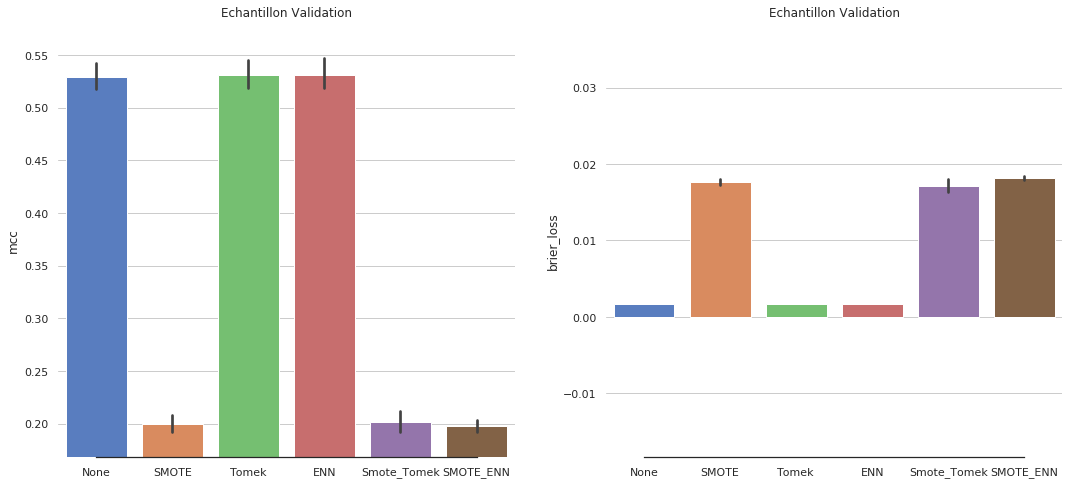

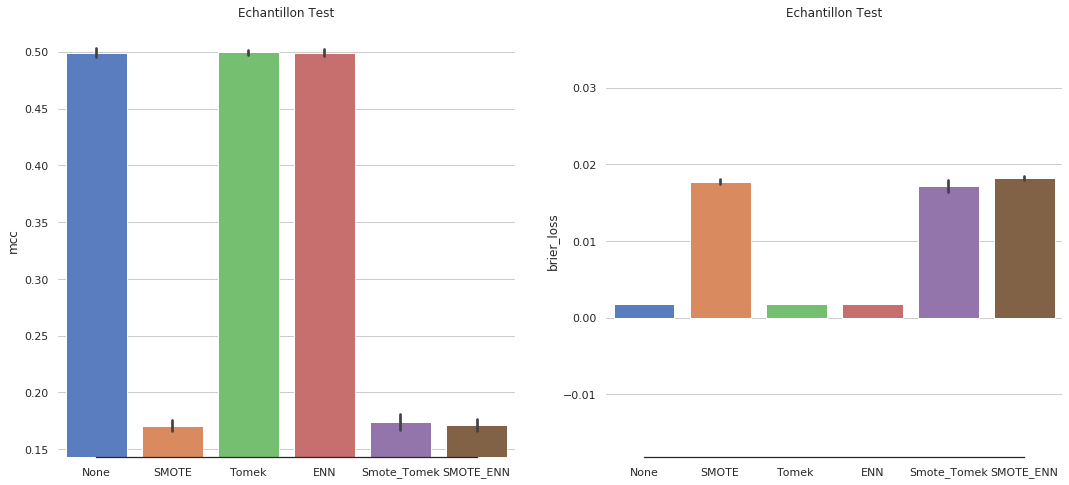

In [223]:
# Try different re-sampling methods with a RandomForestClassifier
# For some reason sklearn and imblearn's default is to use only one processor core
# Most people have multiple cores these days!
# n_jobs=-1 will run the model on all cores in parallel, which can speed things up quite a bit

smote = SMOTE(random_state=42, ratio='minority')
tomek = TomekLinks(n_jobs=-1, ratio='majority', random_state=42)
enn = EditedNearestNeighbours(n_jobs=-1, random_state=42)
smote_tomek = SMOTETomek(random_state=42, ratio='auto')
smote_enn = SMOTEENN(random_state=42, ratio='auto')

#rus = RandomUnderSampler(ratio={1: 1000, 0: 65})
#tomek = TomekLinks(ratio={1: 1000, 0: 65}, random_state=42)
#ncr = NeighbourhoodCleaningRule(ratio={1: 1000, 0: 65}, random_state=42)

xgb = XGBClassifier(nthread=-1,random_state=42)
 
models = []
# Format is name, model, resampling method, probability calibration
models.append(('None', xgb, None, None))
models.append(('SMOTE', xgb, smote, None)) 
models.append(('Tomek', xgb, tomek, None))
models.append(('ENN', xgb, enn, None))
models.append(('Smote_Tomek', xgb, smote_tomek, None))
models.append(('SMOTE_ENN', xgb, smote_enn, None))
 
results_df_valid = pd.DataFrame()
results_df_test = pd.DataFrame()
for name, model, resampling, calibrate in models:
    result_valid, result_test = model_resampling(model, X_train, X_test, y_train, y_test, resampling, calibrate)
    result_valid['name'] = name
    result_test['name'] = name
    results_df_valid = results_df_valid.append(result_valid)
    results_df_test = results_df_test.append(result_test)
     
barplot_comparison(results_df_valid,"Echantillon Validation")
barplot_comparison(results_df_test,"Echantillon Test")

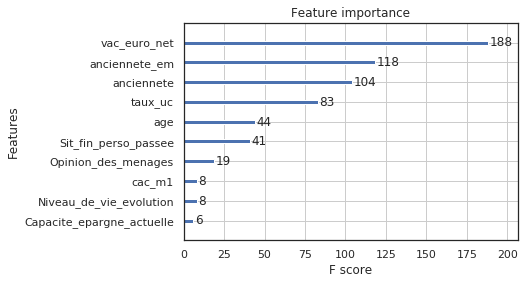

In [193]:
# fit model on all training data
xgb_enn = XGBClassifier(nthread=-1,random_state=42)
enn = EditedNearestNeighbours(n_jobs=-1, random_state=42)
X_enn, y_enn = enn.fit_resample(X_std, y)
xgb_enn.fit(pd.DataFrame(X_enn,columns = X_std.columns), y_enn)
plot_importance(xgb_enn,max_num_features=10)
plt.show()

In [194]:
pd.DataFrame(X_enn,columns = X_std.columns).shape,X_std.shape

((791004, 26), (794729, 26))

In [195]:
xgb_enn_pred = xgb_enn.predict(X_std)

print("Accuracy: %.2f%%" % (accuracy_score(y, xgb_enn_pred) * 100.0))
print("MCC: %.2f%%" % (matthews_corrcoef(y, xgb_enn_pred) * 100.0))
print('')
print('Confusion Matrix')
confusion_matrix(y, xgb_enn_pred)

Accuracy: 99.83%
MCC: 52.42%

Confusion Matrix


array([[792690,    179],
       [  1207,    653]])

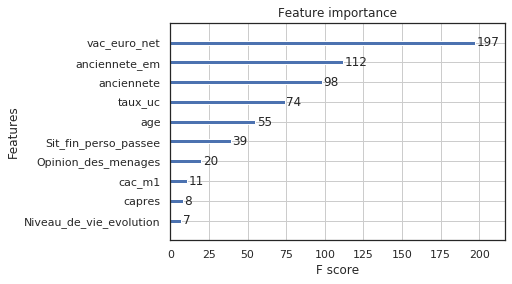

In [196]:
# fit model on all training data
xgb_tomek = XGBClassifier(nthread=-1,random_state=42)
tomek = TomekLinks(n_jobs=-1, ratio='majority', random_state=42)
X_tomek, y_tomek = tomek.fit_resample(X_std, y)
xgb_tomek.fit(pd.DataFrame(X_tomek,columns = X_std.columns), y_tomek)
plot_importance(xgb_tomek,max_num_features=10)
plt.show()

In [197]:
pd.DataFrame(X_tomek,columns = X_std.columns).shape,X_std.shape

((793994, 26), (794729, 26))

In [198]:
xgb_tomek_pred = xgb_tomek.predict(X_std)

print("Accuracy: %.2f%%" % (accuracy_score(y, xgb_tomek_pred) * 100.0))
print("MCC: %.2f%%" % (matthews_corrcoef(y, xgb_tomek_pred) * 100.0))
print('')
print('Confusion Matrix')
confusion_matrix(y, xgb_tomek_pred)

Accuracy: 99.83%
MCC: 52.06%

Confusion Matrix


array([[792715,    154],
       [  1231,    629]])

In [ ]:
from xgboost import plot_importance
# plot feature importance
plot_importance(model,max_num_features=10)
plt.show()

In [189]:
mm_scaler = MinMaxScaler()
X_std = pd.DataFrame(mm_scaler.fit_transform(X),columns = X.columns)

feat_labels =  X.dtypes.pipe(lambda x: x).index

xgb = XGBClassifier(nthread=-1,random_state=42)
xgb.fit(X_std, y)
for feature in zip(feat_labels, xgb.feature_importances_):
    print(feature)

/home/sylvain/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


('tmg', 0.0)
('vac_euro_net', 0.31288344)
('sexe', 0.004601227)
('capres', 0.009202454)
('nb_support', 0.0)
('age', 0.081288345)
('anciennete', 0.15030675)
('anciennete_em', 0.1595092)
('taux_uc', 0.11196319)
('cac_m1', 0.01993865)
('cac_m2', 0.0030674846)
('cac_m3', 0.0030674846)
('cac_m12', 0.006134969)
('Opinion_des_menages', 0.032208588)
('Niveau_de_vie_passee', 0.004601227)
('Niveau_de_vie_evolution', 0.010736196)
('Chomage_evolution', 0.0)
('Prix_evol_passee', 0.0)
('Prix_evol_futur', 0.0)
('Opportunite_achats_importants', 0.0015337423)
('Opportunite_epargner', 0.004601227)
('Capacite_epargne_actuelle', 0.0076687117)
('Sit_fin_perso_passee', 0.061349694)
('Sit_fin_perso_evolution', 0.012269938)
('Capacite_epargne_future', 0.0015337423)
('moyenne', 0.0015337423)


[0.         0.31288344 0.00460123 0.00920245 0.         0.08128835
 0.15030675 0.1595092  0.11196319 0.01993865 0.00306748 0.00306748
 0.00613497 0.03220859 0.00460123 0.0107362  0.         0.
 0.         0.00153374 0.00460123 0.00766871 0.06134969 0.01226994
 0.00153374 0.00153374]


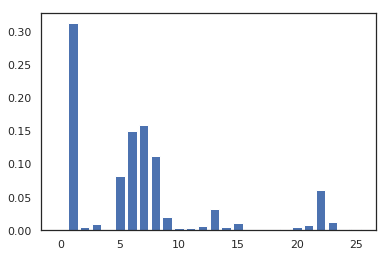

In [190]:
# feature importance
print(xgb.feature_importances_)
# plot
plt.bar(range(len(xgb.feature_importances_)), xgb.feature_importances_)
plt.show()

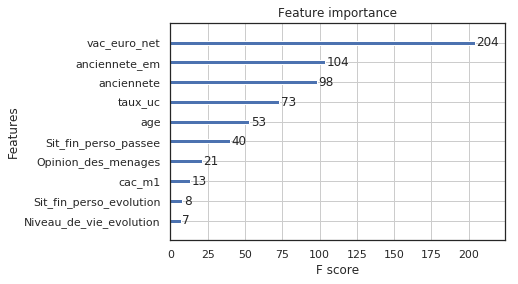

In [191]:
from xgboost import plot_importance
# plot feature importance
plot_importance(xgb,max_num_features=10)
plt.show()

ImportError: You must install graphviz to plot tree

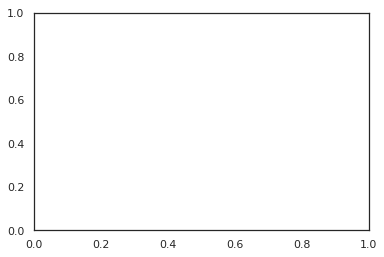

In [47]:
# plot single tree
#plot_tree(model)
#plot_tree(model, num_trees=4)
plot_tree(xgb, num_trees=4, rankdir='LR')
plt.show()

Method: LogisticRegression with RandomUnderSampler resampling and uncalibrated probabilities
Goals: 372.00
Predicted Goals: 82293.37
MCC: 2.74%
Brier Loss: 29.63%
F1_score: 0.71%
Recall_score: 82.15%
Accuracy: 46.22%

Method: RandomForestClassifier with RandomUnderSampler resampling and uncalibrated probabilities
Goals: 372.00
Predicted Goals: 74873.14
MCC: 3.46%
Brier Loss: 25.44%
F1_score: 0.87%
Recall_score: 74.73%
Accuracy: 60.32%

Method: BalancedRandomForestClassifier with RandomUnderSampler resampling and uncalibrated probabilities
Goals: 372.00
Predicted Goals: 75209.85
MCC: 3.51%
Brier Loss: 25.33%
F1_score: 0.87%
Recall_score: 76.13%
Accuracy: 59.56%

Method: AdaBoostClassifier with RandomUnderSampler resampling and uncalibrated probabilities
Goals: 372.00
Predicted Goals: 79639.98
MCC: 2.64%
Brier Loss: 25.11%
F1_score: 0.69%
Recall_score: 82.69%
Accuracy: 44.50%

Method: XGBClassifier with RandomUnderSampler resampling and uncalibrated probabilities
Goals: 372.00
Predicted 

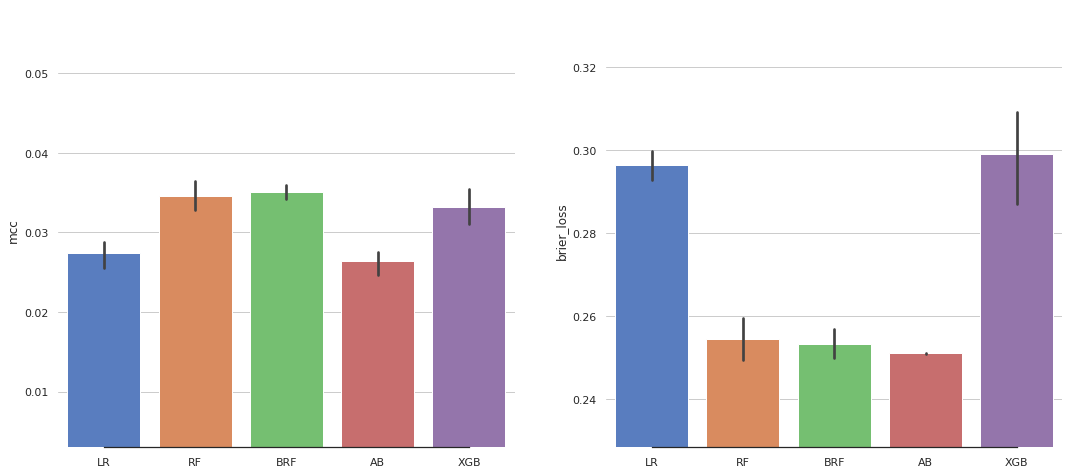

In [75]:
# Model results with under sampling
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
lr = LogisticRegression(solver='lbfgs')
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
ab = AdaBoostClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(nthread=-1,random_state=42)

rus = RandomUnderSampler(random_state=42)

models = []
models.append(('LR', lr, rus, None))
models.append(('RF', rf, rus, None))
models.append(('BRF', brf, rus, None))
models.append(('AB', ab, rus, None))
models.append(('XGB', xgb, rus, None))
 
results_df = pd.DataFrame()
for name, model, resampling, calibrate in models:
    result = model_resampling(model, X_important, y, resampling, calibrate)
    result['name'] = name
    results_df = results_df.append(result)
     
barplot_comparison(results_df)

/home/sylvain/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:543: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/sylvain/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sylvain/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:543: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/sylvain/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sylvain/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:543: RuntimeWarning: invalid value enco

Method: LogisticRegression with no resampling and uncalibrated probabilities
Goals: 372.00
Predicted Goals: 371.98
MCC: 0.00%
Brier Loss: 0.23%
F1_score: 0.00%
Recall_score: 0.00%
Accuracy: 99.77%

Method: RandomForestClassifier with no resampling and uncalibrated probabilities
Goals: 372.00
Predicted Goals: 351.93
MCC: 39.76%
Brier Loss: 0.19%
F1_score: 32.09%
Recall_score: 21.34%
Accuracy: 99.81%

Method: BalancedRandomForestClassifier with no resampling and uncalibrated probabilities
Goals: 372.00
Predicted Goals: 55529.69
MCC: 5.34%
Brier Loss: 15.46%
F1_score: 1.42%
Recall_score: 67.90%
Accuracy: 77.95%



/home/sylvain/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:543: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/sylvain/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sylvain/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:543: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/sylvain/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sylvain/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:543: RuntimeWarning: invalid value enco

Method: AdaBoostClassifier with no resampling and uncalibrated probabilities
Goals: 372.00
Predicted Goals: 76517.07
MCC: 1.04%
Brier Loss: 23.19%
F1_score: 0.11%
Recall_score: 0.05%
Accuracy: 99.77%



/home/sylvain/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:543: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/sylvain/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sylvain/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:543: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/sylvain/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Method: XGBClassifier with no resampling and uncalibrated probabilities
Goals: 372.00
Predicted Goals: 327.53
MCC: 31.48%
Brier Loss: 0.19%
F1_score: 28.75%
Recall_score: 20.43%
Accuracy: 99.80%



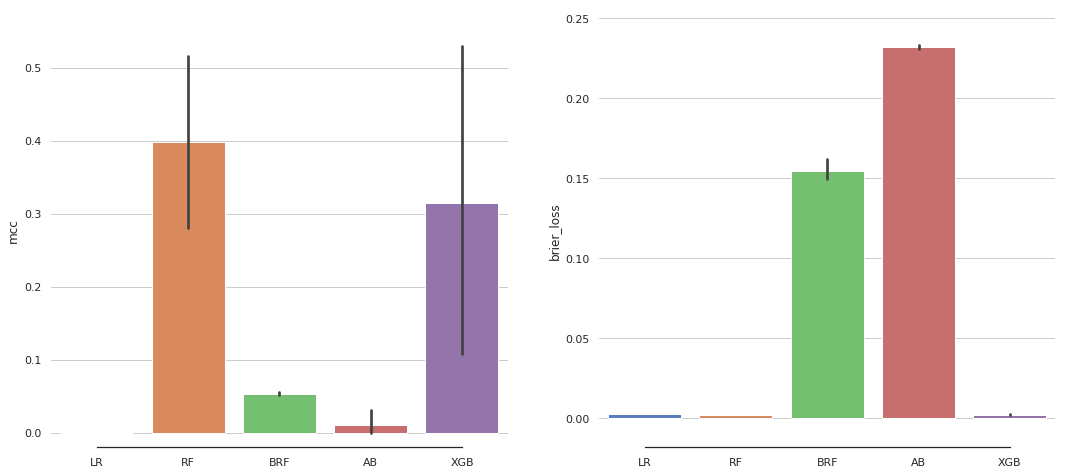

In [76]:
# Model results without resampling
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
lr = LogisticRegression(solver='lbfgs')
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
ab = AdaBoostClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(nthread=-1,random_state=42)

models = []
models.append(('LR', lr, None, None))
models.append(('RF', rf, None, None))
models.append(('BRF', brf, None, None))
models.append(('AB', ab, None, None))
models.append(('XGB', xgb, None, None))
 
results_df = pd.DataFrame()
for name, model, resampling, calibrate in models:
    result = model_resampling(model, X_important, y, resampling, calibrate)
    result['name'] = name
    results_df = results_df.append(result)
     
barplot_comparison(results_df)

Method: LogisticRegression with RandomOverSampler resampling and uncalibrated probabilities
Goals: 372.00
Predicted Goals: 82165.05
MCC: 2.74%
Brier Loss: 29.48%
F1_score: 0.71%
Recall_score: 82.15%
Accuracy: 46.24%

Method: RandomForestClassifier with RandomOverSampler resampling and uncalibrated probabilities
Goals: 372.00
Predicted Goals: 5904.35
MCC: 9.43%
Brier Loss: 1.82%
F1_score: 5.58%
Recall_score: 33.71%
Accuracy: 97.19%

Method: BalancedRandomForestClassifier with RandomOverSampler resampling and uncalibrated probabilities
Goals: 372.00
Predicted Goals: 8209.52
MCC: 8.15%
Brier Loss: 2.43%
F1_score: 4.16%
Recall_score: 36.29%
Accuracy: 96.02%

Method: AdaBoostClassifier with RandomOverSampler resampling and uncalibrated probabilities
Goals: 372.00
Predicted Goals: 79599.56
MCC: 2.60%
Brier Loss: 25.08%
F1_score: 0.70%
Recall_score: 80.32%
Accuracy: 46.58%

Method: XGBClassifier with RandomOverSampler resampling and uncalibrated probabilities
Goals: 372.00
Predicted Goals: 78

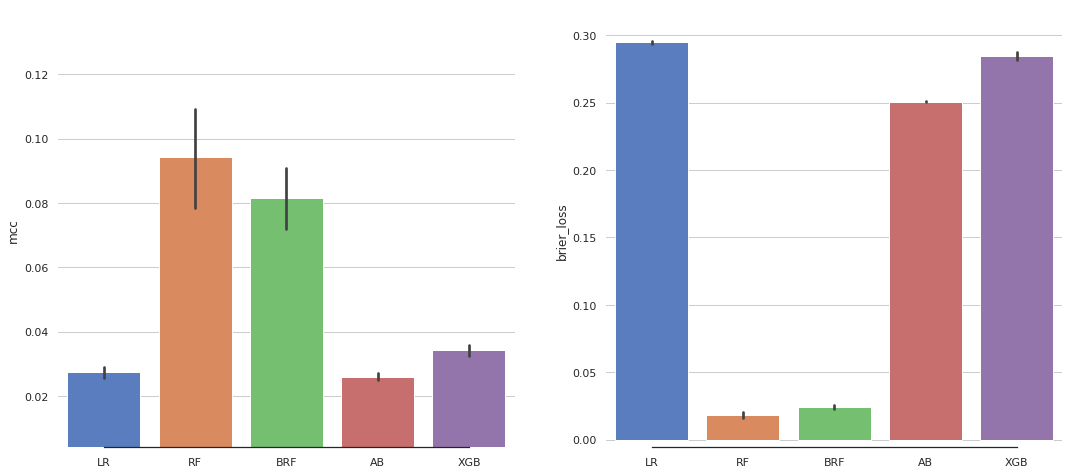

In [74]:
# Model results with over sampling
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
lr = LogisticRegression(solver='lbfgs')
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
ab = AdaBoostClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(nthread=-1,random_state=42)

ros = RandomOverSampler(random_state=42)

models = []
models.append(('LR', lr, ros, None))
models.append(('RF', rf, ros, None))
models.append(('BRF', brf, ros, None))
models.append(('AB', ab, ros, None))
models.append(('XGB', xgb, ros, None))
 
results_df = pd.DataFrame()
for name, model, resampling, calibrate in models:
    result = model_resampling(model, X_important, y, resampling, calibrate)
    result['name'] = name
    results_df = results_df.append(result)
     
barplot_comparison(results_df)

In [85]:
# Models used for comparing resampling methods
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
ab = AdaBoostClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(nthread=-1,random_state=42)

Random under-sampling:
1    1189
0    1189
Name: arb, dtype: int64


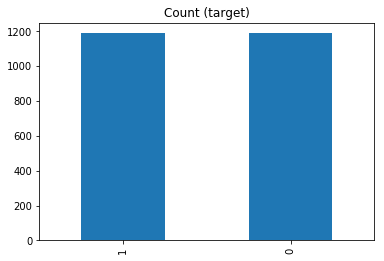

In [143]:
# Resampling

# Class count
count_class_0, count_class_1 = df_subset.arb.value_counts()

# Divide by class
df_class_0 = df_subset[df_subset['arb'] == 0]
df_class_1 = df_subset[df_subset['arb'] == 1]

df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.arb.value_counts())

df_test_under.arb.value_counts().plot(kind='bar', title='Count (target)');

# split data into train and test sets
X = df_test_under[['sexe','age','anciennete','anciennete_em','taux_uc','vac_euro_net','capres']]
y = df_test_under.arb

Random over-sampling:
1    793540
0    793540
Name: arb, dtype: int64


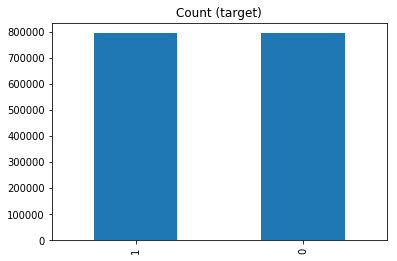

In [154]:
# Random over-sampling
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.arb.value_counts())

df_test_over.arb.value_counts().plot(kind='bar', title='Count (target)');

# split data into train and test sets
X = df_test_over[['sexe','age','anciennete','anciennete_em','taux_uc','vac_euro_net','capres']]
y = df_test_over.arb

In [30]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

RandomUnderSampler(random_state=None, ratio=None, replacement=False,
          return_indices=True, sampling_strategy='auto')
Removed indexes: [173663 334537 517665 ... 531565 532177 532367]


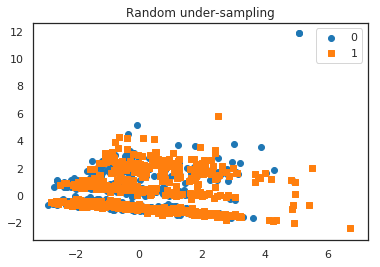

Accuracy: 99.85%
Confusion Matrix


array([[261876,      0],
       [   385,      0]])

In [47]:
# Random under-sampling and over-sampling with imbalanced-learn

# split data into X and y
X = pd.DataFrame(df_subset[['sexe','age','anciennete','anciennete_em','taux_uc','vac_euro_net','capres']])
y = df_subset.arb

# split data into train and test sets
seed = 42
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# Normalize the data
X_train_std = pd.DataFrame(ss.fit_transform(X_train),columns = X_train.columns)
X_test_std = pd.DataFrame(ss.fit_transform(X_test),columns = X_test.columns)

rus = RandomUnderSampler(return_indices=True)
print(rus)
X_rus, y_rus, id_rus = rus.fit_sample(X_train_std, y_train)
X_rus = pd.DataFrame(X_rus, columns = X_train_std.columns)

print('Removed indexes:', id_rus)

pca = PCA(n_components=2)
X_rus_pca = pca.fit_transform(X_rus)
plot_2d_space(X_rus_pca, y_rus, 'Random under-sampling')

530860 new random picked points


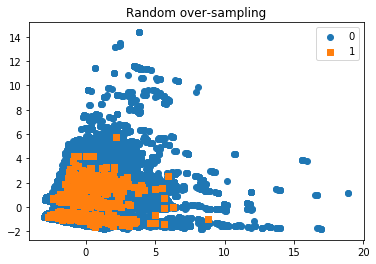

In [162]:
from imblearn.over_sampling import RandomOverSampler

# split data into X and y
X = pd.DataFrame(df_subset[['sexe','age','anciennete','anciennete_em','taux_uc','vac_euro_net','capres']])
y = df_subset.arb

# split data into train and test sets
seed = 42
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# Normalize the data
X_train_sdt = pd.DataFrame(ss.fit_transform(X_train),columns = X_train.columns)
X_test_sdt = pd.DataFrame(ss.fit_transform(X_test),columns = X_test.columns)

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X_train_sdt, y_train)
X_ros = pd.DataFrame(X_ros, columns = X_train_sdt.columns)

print(X_ros.shape[0] - X_train_sdt.shape[0], 'new random picked points')

pca = PCA(n_components=2)
X_ros_pca = pca.fit_transform(X_ros)
plot_2d_space(X_ros_pca, y_ros, 'Random over-sampling')

Removed indexes: [     0      1      2 ... 532465 532466 532467]
532468 total examples in y_train
class 0: 531664 examples, 99.85%
class 1: 804 examples, 0.15%

None
532231 total examples in y_tl
class 0: 531427 examples, 99.85%
class 1: 804 examples, 0.15%

None


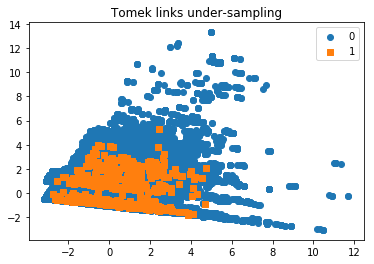

In [166]:
# Under-sampling: Tomek links

# split data into X and y
X = pd.DataFrame(df_subset[['sexe','age','anciennete','anciennete_em','taux_uc','vac_euro_net','capres']])
y = df_subset.arb

# split data into train and test sets
seed = 42
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# Normalize the data
X_train_std = pd.DataFrame(ss.fit_transform(X_train),columns = X_train.columns)
X_test_std = pd.DataFrame(ss.fit_transform(X_test),columns = X_test.columns)

tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X_train_std, y_train)
X_tl = pd.DataFrame(X_tl, columns = X_train_std.columns)

print('Removed indexes:', id_tl)
print(get_class_dist(data=y_train, name='y_train'))
print(get_class_dist(data=y_tl, name='y_tl'))

pca = PCA(n_components=2)
X_tl_pca = pca.fit_transform(X_tl)
plot_2d_space(X_tl_pca, y_tl, 'Tomek links under-sampling')

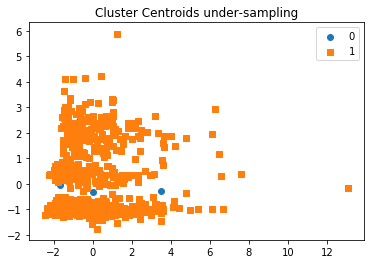

Accuracy: 0.15%


In [531]:
# Under-sampling: Cluster Centroids
from imblearn.under_sampling import ClusterCentroids

# split data into X and y
X = pd.DataFrame(df_subset[['sexe','age','anciennete','anciennete_em','taux_uc','vac_euro_net','capres']])
y = df_subset.arb

# split data into train and test sets
seed = 42
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# Normalize the data
X_train_sdt = pd.DataFrame(ss.fit_transform(X_train),columns = X_train.columns)
X_test_sdt = pd.DataFrame(ss.fit_transform(X_test),columns = X_test.columns)

cc = ClusterCentroids(ratio={0: 10})
X_cc, y_cc = cc.fit_sample(X_train_sdt, y_train)
X_cc = pd.DataFrame(X_cc, columns = X_train_sdt.columns)

pca = PCA(n_components=2)
X_cc_pca = pca.fit_transform(X_cc)
plot_2d_space(X_cc_pca, y_cc, 'Cluster Centroids under-sampling')

model = XGBClassifier()
model.fit(X_cc, y_cc)
y_pred = model.predict(X_test_sdt)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

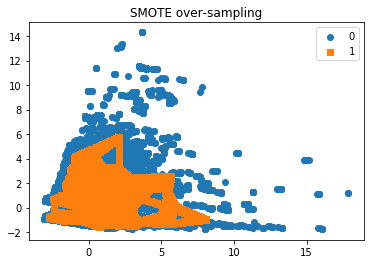

In [170]:
# Over-sampling: SMOTE

# split data into X and y
X = pd.DataFrame(df_subset[['sexe','age','anciennete','anciennete_em','taux_uc','vac_euro_net','capres']])
y = df_subset.arb

# split data into train and test sets
seed = 42
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# Normalize the data
X_train_sdt = pd.DataFrame(ss.fit_transform(X_train),columns = X_train.columns)
X_test_sdt = pd.DataFrame(ss.fit_transform(X_test),columns = X_test.columns)

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X_train_sdt, y_train)
X_sm = pd.DataFrame(X_sm, columns = X_train_sdt.columns)

pca = PCA(n_components=2)
X_sm_pca = pca.fit_transform(X_sm)
plot_2d_space(X_sm_pca, y_sm, 'SMOTE over-sampling')

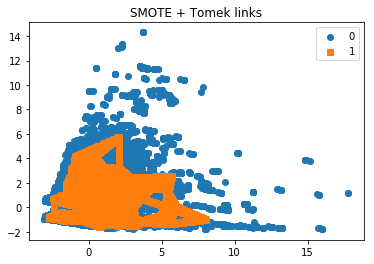

In [175]:
# Over-sampling followed by under-sampling

# split data into X and y
X = pd.DataFrame(df_subset[['sexe','age','anciennete','anciennete_em','taux_uc','vac_euro_net','capres']])
y = df_subset.arb

# split data into train and test sets
seed = 42
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# Normalize the data
X_train_sdt = pd.DataFrame(ss.fit_transform(X_train),columns = X_train.columns)
X_test_sdt = pd.DataFrame(ss.fit_transform(X_test),columns = X_test.columns)

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X_train_sdt, y_train)
X_smt = pd.DataFrame(X_smt, columns = X_train_sdt.columns)

pca = PCA(n_components=2)
X_smt_pca = pca.fit_transform(X_smt)
plot_2d_space(X_smt_pca, y_smt, 'SMOTE + Tomek links')

In [199]:
# import packages
# matplotlib inline
from scipy import stats
import tensorflow as tf
import pickle
from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

In [204]:
xgb = XGBClassifier(n_estimators=100, nthread=-1,random_state=42)
xgb.fit(X_std, y)
sfm = SelectFromModel(xgb, threshold = 0.01, prefit=True)
X_auto = pd.DataFrame(sfm.transform(X), columns = X.columns[sfm.get_support()])

In [205]:
df_auto = df_auto = pd.merge(X_auto, y, left_index=True, right_index=True)
df_auto.columns, df_auto.shape, type(df_auto)

(Index(['vac_euro_net', 'age', 'anciennete', 'anciennete_em', 'taux_uc',
        'cac_m1', 'Opinion_des_menages', 'Niveau_de_vie_evolution',
        'Sit_fin_perso_passee', 'Sit_fin_perso_evolution', 'arb'],
       dtype='object'), (794729, 11), pandas.core.frame.DataFrame)

In [228]:
# split data into train and test sets
seed = 42
test_size = 0.33
X_train, X_test = train_test_split(df_subset[['vac_euro_net', 'age', 'anciennete', 'anciennete_em', 'taux_uc',
        'cac_m1', 'Opinion_des_menages', 'Niveau_de_vie_evolution',
        'Sit_fin_perso_passee', 'Sit_fin_perso_evolution', 'arb']], test_size=test_size, random_state=seed)

X_train = X_train[X_train.arb == 0] #where normal transactions
X_train = X_train.drop(['arb'], axis=1) #drop the class column

y_test = X_test['arb'] #save the class column for the test set
X_test = X_test.drop(['arb'], axis=1) #drop the class column

mm_scaler = MinMaxScaler()
X_train_std = mm_scaler.fit_transform(X_train)
X_test_std = mm_scaler.fit_transform(X_test)

In [229]:
# Autoencoder Layer Structure and Parameters
nb_epoch = 50
batch_size = 128
input_dim = X_train_std.shape[1] #num of columns
encoding_dim = 14
hidden_dim = int(encoding_dim / 2) #i.e. 7
learning_rate = 1e-7

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(hidden_dim, activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [230]:
# Model Training and Logging
autoencoder.compile(metrics=['accuracy'],
                    #loss='mean_squared_error',
                    loss = 'binary_crossentropy'
                    optimizer='adam')

cp = ModelCheckpoint(filepath="autoencoder_fraud.h5",
                               save_best_only=True,
                               verbose=0)

tb = TensorBoard(log_dir='./logs',
                histogram_freq=0,
                write_graph=True,
                write_images=True)

history = autoencoder.fit(X_train_std, X_train_std,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test_std, X_test_std),
                    verbose=1,
                    callbacks=[cp, tb]).history

Train on 531232 samples, validate on 262261 samples
Epoch 1/50
531232/531232 [==============================] - 57s 108us/step - loss: 0.0170 - acc: 0.7522 - val_loss: 0.0020 - val_acc: 0.7834
Epoch 2/50
531232/531232 [==============================] - 53s 100us/step - loss: 0.0013 - acc: 0.8527 - val_loss: 0.0011 - val_acc: 0.8826
Epoch 3/50
531232/531232 [==============================] - 46s 87us/step - loss: 0.0011 - acc: 0.8679 - val_loss: 0.0011 - val_acc: 0.8613
Epoch 4/50
531232/531232 [==============================] - 47s 88us/step - loss: 0.0011 - acc: 0.8683 - val_loss: 0.0011 - val_acc: 0.8774
Epoch 5/50
531232/531232 [==============================] - 54s 101us/step - loss: 0.0011 - acc: 0.8669 - val_loss: 0.0011 - val_acc: 0.8573
Epoch 6/50
531232/531232 [==============================] - 51s 96us/step - loss: 0.0010 - acc: 0.8643 - val_loss: 0.0011 - val_acc: 0.8650
Epoch 7/50
531232/531232 [==============================] - 51s 95us/step - loss: 0.0010 - acc: 0.8648 - 

In [231]:
autoencoder = load_model('autoencoder_fraud.h5')

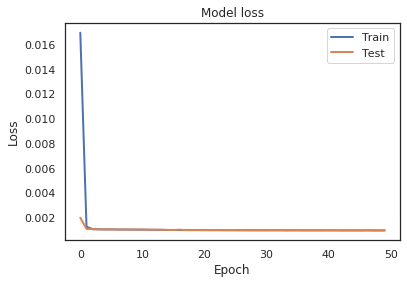

In [232]:
# Model Loss
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

In [233]:
# Reconstruction Error Check
X_test_predictions = autoencoder.predict(X_test_std)
mse = np.mean(np.power(X_test_std - X_test_predictions, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': y_test})
error_df.describe()

,Reconstruction_error,True_class
count,2.622610e+05,262261.000000
mean,9.598246e-04,0.002379
std,2.280886e-03,0.048720
min,8.476902e-07,0.000000
25%,2.150840e-04,0.000000
50%,3.855730e-04,0.000000
75%,8.102304e-04,0.000000
max,1.000780e-01,1.000000


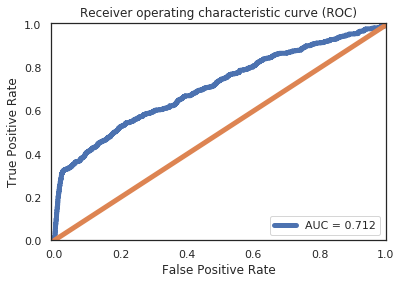

In [234]:
# ROC Curve Check
false_pos_rate, true_pos_rate, thresholds = roc_curve(error_df.True_class, error_df.Reconstruction_error)
roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

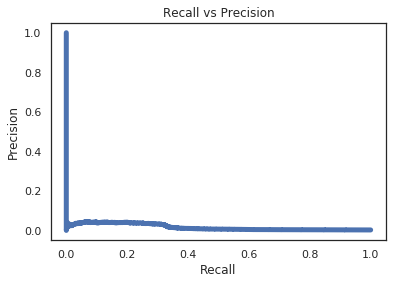

In [235]:
# Recall vs. Precision Thresholding
precision_rt, recall_rt, threshold_rt = precision_recall_curve(error_df.True_class, error_df.Reconstruction_error)
plt.plot(recall_rt, precision_rt, linewidth=5, label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

/home/sylvain/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sylvain/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sylvain/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sylvain/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sylvain/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large

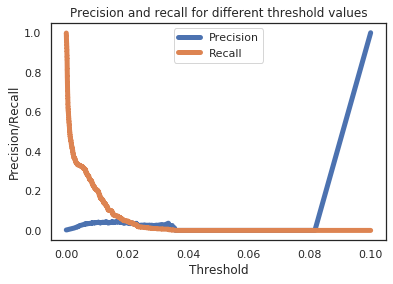

In [236]:
plt.plot(threshold_rt, precision_rt[1:], label="Precision",linewidth=5)
plt.plot(threshold_rt, recall_rt[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

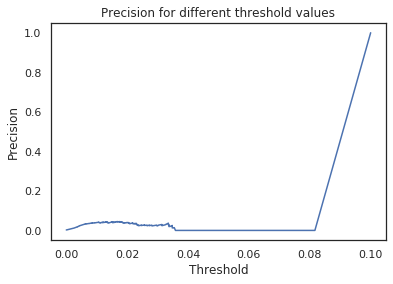

In [237]:
plt.plot(threshold_rt, precision_rt[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

/home/sylvain/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sylvain/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sylvain/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sylvain/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sylvain/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large

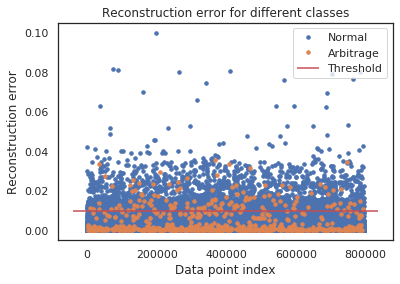

In [240]:
# Reconstruction Error vs Threshold Check
threshold_fixed = 0.01
groups = error_df.groupby('True_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Arbitrage" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

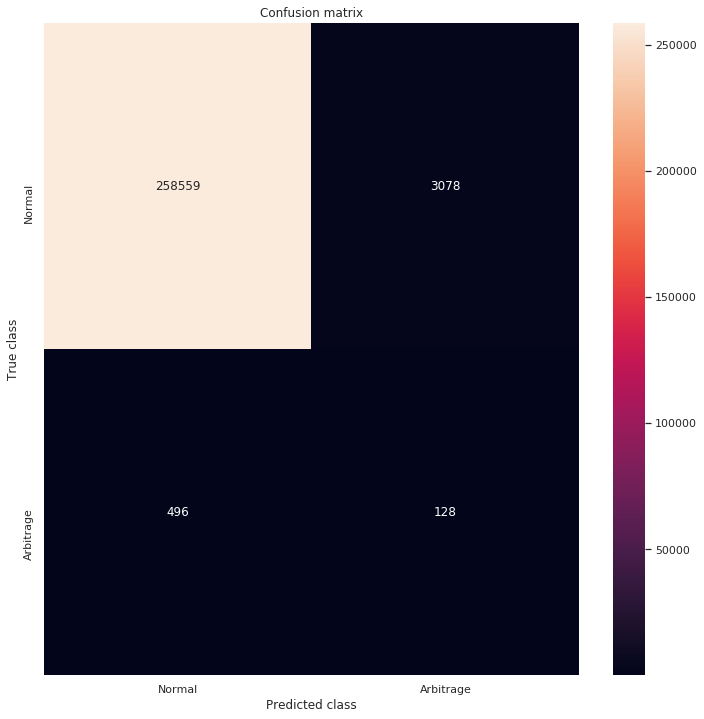

In [241]:
# Confusion Matrix
LABELS = ["Normal","Arbitrage"]

pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.True_class, pred_y)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()